In [44]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from keras.layers import Dense, Input, Dropout
from keras.layers.recurrent import GRU,SimpleRNN,RNN,LSTM
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import r2_score

In [2]:
CallDetail=pd.read_excel('Raw Data\\Interval data combine Jan to April.xlsx',encoding='ISO-8859-1')
CallDetail.shape

(982, 30)

In [3]:
CallDetail.columns

Index(['Date', 'OC_EFTB', 'OC_EGTB', 'OC_EGIB', 'OC_ELIB', 'OC_ELBB',
       'OC_EGBB', 'AC_EFTB', 'AC_EGTB', 'AC_EGIB', 'AC_ELIB', 'AC_ELBB',
       'AC_EGBB', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', '8am', '9am', '10am', '11am', '12pm', '13pm', '14pm',
       '15pm', '16pm', '17pm', '18pm'],
      dtype='object')

In [4]:
CallDetail=CallDetail.set_index('Date')
CallDetail.index=pd.to_datetime(CallDetail.index,format='%Y/%m/%d %H')

In [5]:
CallDetailWeekday=CallDetail[CallDetail['Saturday']==0]
CallDetailWeekend=CallDetail[CallDetail['Saturday']==1]

In [ ]:
CallDetailWeekday

In [6]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
CallDetailWeekday['scaled_EFTB'] = scaler1.fit_transform(np.array(CallDetailWeekday['OC_EFTB']).reshape(-1, 1))
scaler1s = MinMaxScaler(feature_range=(0, 1))
CallDetailWeekend['scaled_EFTB'] = scaler1s.fit_transform(np.array(CallDetailWeekend['OC_EFTB']).reshape(-1, 1))

C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd 

In [7]:
scaler2 = MinMaxScaler(feature_range=(0, 1))
CallDetailWeekday['scaled_EGTB'] = scaler2.fit_transform(np.array(CallDetailWeekday['OC_EGTB']).reshape(-1, 1))
scaler2s = MinMaxScaler(feature_range=(0, 1))
CallDetailWeekend['scaled_EGTB'] = scaler2s.fit_transform(np.array(CallDetailWeekend['OC_EGTB']).reshape(-1, 1))

C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd 

In [8]:
scaler3 = MinMaxScaler(feature_range=(0, 1))
CallDetailWeekday['scaled_EGIB'] = scaler3.fit_transform(np.array(CallDetailWeekday['OC_EGIB']).reshape(-1, 1))
scaler3s = MinMaxScaler(feature_range=(0, 1))
CallDetailWeekend['scaled_EGIB'] = scaler3s.fit_transform(np.array(CallDetailWeekend['OC_EGIB']).reshape(-1, 1))

C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd 

In [9]:
scaler4 = MinMaxScaler(feature_range=(0, 1))
CallDetailWeekday['scaled_ELIB'] = scaler4.fit_transform(np.array(CallDetailWeekday['OC_ELIB']).reshape(-1, 1))
scaler4s = MinMaxScaler(feature_range=(0, 1))
CallDetailWeekend['scaled_ELIB'] = scaler4s.fit_transform(np.array(CallDetailWeekend['OC_ELIB']).reshape(-1, 1))

C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd 

In [10]:
scaler5 = MinMaxScaler(feature_range=(0, 1))
CallDetailWeekday['scaled_ELBB'] = scaler5.fit_transform(np.array(CallDetailWeekday['OC_ELBB']).reshape(-1, 1))
#scaler5s = MinMaxScaler(feature_range=(0, 1))
#CallDetailWeekend['scaled_ELBB'] = scaler5s.fit_transform(np.array(CallDetailWeekend['OC_ELBB']).reshape(-1, 1))

C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
scaler6 = MinMaxScaler(feature_range=(0, 1))
CallDetailWeekday['scaled_EGBB'] = scaler6.fit_transform(np.array(CallDetailWeekday['OC_EGBB']).reshape(-1, 1))
#scaler6s = MinMaxScaler(feature_range=(0, 1))
#CallDetailWeekend['scaled_EGBB'] = scaler6s.fit_transform(np.array(CallDetailWeekend['OC_EGBB']).reshape(-1, 1))

C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\00130161\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
CallDetailWeekend

In [12]:
"""
Let's start by splitting the dataset into train and validation.
"""
split_date = datetime.datetime(year=2018, month=4, day=2, hour=8)
split_dates = datetime.datetime(year=2018, month=4, day=7, hour=8)
CallDetailWeekday_train = CallDetailWeekday.loc[CallDetailWeekday.index<split_date]
CallDetailWeekday_val = CallDetailWeekday.loc[CallDetailWeekday.index>=split_date]
CallDetailWeekend_train = CallDetailWeekend.loc[CallDetailWeekend.index<split_dates]
CallDetailWeekend_val = CallDetailWeekend.loc[CallDetailWeekend.index>=split_dates]

print('Shape of Weekday train:', CallDetailWeekday_train.shape)
print('Shape of Weekday test:', CallDetailWeekday_val.shape)
print('Shape of Saturday train:', CallDetailWeekend_train.shape)
print('Shape of Saturday test:', CallDetailWeekend_val.shape)

Shape of Weekday train: (671, 35)
Shape of Weekday test: (231, 35)
Shape of Saturday train: (60, 33)
Shape of Saturday test: (20, 33)


In [13]:
def makeXy(ts, nb_timesteps):
    """
    Input: 
           ts: original time series
           nb_timesteps: number of time steps in the regressors
    Output: 
           X: 2-D array of regressors
           y: 1-D array of target 
    """
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [14]:
CallDetailWeekday_train=CallDetailWeekday_train.reset_index()
CallDetailWeekend_train=CallDetailWeekend_train.reset_index()

In [15]:
EFTBWeekdayX_train, EFTBWeekdayy_train = makeXy(CallDetailWeekday_train['scaled_EFTB'], 11)
EGTBWeekdayX_train, EGTBWeekdayy_train = makeXy(CallDetailWeekday_train['scaled_EGTB'], 11)
EGIBWeekdayX_train, EGIBWeekdayy_train = makeXy(CallDetailWeekday_train['scaled_EGIB'], 11)
ELIBWeekdayX_train, ELIBWeekdayy_train = makeXy(CallDetailWeekday_train['scaled_ELIB'], 11)
ELBBWeekdayX_train, ELBBWeekdayy_train = makeXy(CallDetailWeekday_train['scaled_ELBB'], 11)
EGBBWeekdayX_train, EGBBWeekdayy_train = makeXy(CallDetailWeekday_train['scaled_EGBB'], 11)

print('Shape of train arrays:', EFTBWeekdayX_train.shape, EFTBWeekdayy_train.shape)
print('Shape of train arrays:', EGTBWeekdayX_train.shape, EGTBWeekdayy_train.shape)
print('Shape of train arrays:', EGIBWeekdayX_train.shape, EGIBWeekdayy_train.shape)
print('Shape of train arrays:', ELIBWeekdayX_train.shape, ELIBWeekdayy_train.shape)
print('Shape of train arrays:', ELBBWeekdayX_train.shape, ELBBWeekdayy_train.shape)
print('Shape of train arrays:', EGBBWeekdayX_train.shape, EGBBWeekdayy_train.shape)


EFTBWeekendX_train, EFTBWeekendy_train = makeXy(CallDetailWeekend_train['scaled_EFTB'], 5)
EGTBWeekendX_train, EGTBWeekendy_train = makeXy(CallDetailWeekend_train['scaled_EGTB'], 5)
EGIBWeekendX_train, EGIBWeekendy_train = makeXy(CallDetailWeekend_train['scaled_EGIB'], 5)
ELIBWeekendX_train, ELIBWeekendy_train = makeXy(CallDetailWeekend_train['scaled_ELIB'], 5)
#ELBBWeekendX_train, ELBBWeekendy_train = makeXy(CallDetailWeekend_train['scaled_ELBB'], 5)
#EGBBWeekendX_train, EGBBWeekendy_train = makeXy(CallDetailWeekend_train['scaled_EGBB'], 5)

print('Shape of train arrays:', EFTBWeekendX_train.shape, EFTBWeekendy_train.shape)
print('Shape of train arrays:', EGTBWeekendX_train.shape, EGTBWeekendy_train.shape)
print('Shape of train arrays:', EGIBWeekendX_train.shape, EGIBWeekendy_train.shape)
print('Shape of train arrays:', ELIBWeekendX_train.shape, ELIBWeekendy_train.shape)
#print('Shape of train arrays:', ELBBWeekendX_train.shape, ELBBWeekendy_train.shape)
#print('Shape of train arrays:', EGBBWeekendX_train.shape, EGBBWeekendy_train.shape)

Shape of train arrays: (660, 11) (660,)
Shape of train arrays: (660, 11) (660,)
Shape of train arrays: (660, 11) (660,)
Shape of train arrays: (660, 11) (660,)
Shape of train arrays: (660, 11) (660,)
Shape of train arrays: (660, 11) (660,)
Shape of train arrays: (55, 5) (55,)
Shape of train arrays: (55, 5) (55,)
Shape of train arrays: (55, 5) (55,)
Shape of train arrays: (55, 5) (55,)


In [16]:
EFTBWeekdayX_train=np.concatenate((EFTBWeekdayX_train,CallDetailWeekday_train.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
EGTBWeekdayX_train=np.concatenate((EGTBWeekdayX_train,CallDetailWeekday_train.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
EGIBWeekdayX_train=np.concatenate((EGIBWeekdayX_train,CallDetailWeekday_train.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
ELIBWeekdayX_train=np.concatenate((ELIBWeekdayX_train,CallDetailWeekday_train.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
ELBBWeekdayX_train=np.concatenate((ELBBWeekdayX_train,CallDetailWeekday_train.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
EGBBWeekdayX_train=np.concatenate((EGBBWeekdayX_train,CallDetailWeekday_train.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)

print('Shape of train arrays:', EFTBWeekdayX_train.shape, EFTBWeekdayy_train.shape)
print('Shape of train arrays:', EGTBWeekdayX_train.shape, EGTBWeekdayy_train.shape)
print('Shape of train arrays:', EGIBWeekdayX_train.shape, EGIBWeekdayy_train.shape)
print('Shape of train arrays:', ELIBWeekdayX_train.shape, ELIBWeekdayy_train.shape)
print('Shape of train arrays:', ELBBWeekdayX_train.shape, ELBBWeekdayy_train.shape)
print('Shape of train arrays:', EGBBWeekdayX_train.shape, EGBBWeekdayy_train.shape)

EFTBWeekendX_train=np.concatenate((EFTBWeekendX_train,CallDetailWeekend_train.loc[5:,['8am','9am','10am','11am','12pm']].as_matrix()),axis=1)
EGTBWeekendX_train=np.concatenate((EGTBWeekendX_train,CallDetailWeekend_train.loc[5:,['8am','9am','10am','11am','12pm']].as_matrix()),axis=1)
EGIBWeekendX_train=np.concatenate((EGIBWeekendX_train,CallDetailWeekend_train.loc[5:,['8am','9am','10am','11am','12pm']].as_matrix()),axis=1)
ELIBWeekendX_train=np.concatenate((ELIBWeekendX_train,CallDetailWeekend_train.loc[5:,['8am','9am','10am','11am','12pm']].as_matrix()),axis=1)
#ELBBWeekendX_train=np.concatenate((ELBBWeekendX_train,CallDetailWeekend_train.loc[4:,['8am','9am','10am','11am','12pm']].as_matrix()),axis=1)
#EGBBWeekendX_train=np.concatenate((EGBBWeekendX_train,CallDetailWeekend_train.loc[4:,['8am','9am','10am','11am','12pm']].as_matrix()),axis=1)

print('Shape of train arrays:', EFTBWeekendX_train.shape, EFTBWeekendy_train.shape)
print('Shape of train arrays:', EGTBWeekendX_train.shape, EGTBWeekendy_train.shape)
print('Shape of train arrays:', EGIBWeekendX_train.shape, EGIBWeekendy_train.shape)
print('Shape of train arrays:', ELIBWeekendX_train.shape, ELIBWeekendy_train.shape)
#print('Shape of train arrays:', ELBBWeekendX_train.shape, ELBBWeekendy_train.shape)
#print('Shape of train arrays:', EGBBWeekendX_train.shape, EGBBWeekendy_train.shape)

Shape of train arrays: (660, 27) (660,)
Shape of train arrays: (660, 27) (660,)
Shape of train arrays: (660, 27) (660,)
Shape of train arrays: (660, 27) (660,)
Shape of train arrays: (660, 27) (660,)
Shape of train arrays: (660, 27) (660,)
Shape of train arrays: (55, 10) (55,)
Shape of train arrays: (55, 10) (55,)
Shape of train arrays: (55, 10) (55,)
Shape of train arrays: (55, 10) (55,)


In [17]:
CallDetailWeekday_val=CallDetailWeekday_val.reset_index()

In [18]:
CallDetailWeekend_val=CallDetailWeekend_val.reset_index()

In [19]:

EFTBWeekdayX_val, EFTBWeekdayy_val = makeXy(CallDetailWeekday_val['scaled_EFTB'], 11)
EGTBWeekdayX_val, EGTBWeekdayy_val = makeXy(CallDetailWeekday_val['scaled_EGTB'], 11)
EGIBWeekdayX_val, EGIBWeekdayy_val = makeXy(CallDetailWeekday_val['scaled_EGIB'], 11)
ELIBWeekdayX_val, ELIBWeekdayy_val = makeXy(CallDetailWeekday_val['scaled_ELIB'], 11)
ELBBWeekdayX_val, ELBBWeekdayy_val = makeXy(CallDetailWeekday_val['scaled_ELBB'], 11)
EGBBWeekdayX_val, EGBBWeekdayy_val = makeXy(CallDetailWeekday_val['scaled_EGBB'], 11)

print('Shape of train arrays:', EFTBWeekdayX_val.shape, EFTBWeekdayy_val.shape)
print('Shape of train arrays:', EGTBWeekdayX_val.shape, EGTBWeekdayy_val.shape)
print('Shape of train arrays:', EGIBWeekdayX_val.shape, EGIBWeekdayy_val.shape)
print('Shape of train arrays:', ELIBWeekdayX_val.shape, ELIBWeekdayy_val.shape)
print('Shape of train arrays:', ELBBWeekdayX_val.shape, ELBBWeekdayy_val.shape)
print('Shape of train arrays:', EGBBWeekdayX_val.shape, EGBBWeekdayy_val.shape)


EFTBWeekendX_val, EFTBWeekendy_val = makeXy(CallDetailWeekend_val['scaled_EFTB'], 5)
EGTBWeekendX_val, EGTBWeekendy_val = makeXy(CallDetailWeekend_val['scaled_EGTB'], 5)
EGIBWeekendX_val, EGIBWeekendy_val = makeXy(CallDetailWeekend_val['scaled_EGIB'], 5)
ELIBWeekendX_val, ELIBWeekendy_val = makeXy(CallDetailWeekend_val['scaled_ELIB'], 5)
#ELBBWeekendX_val, ELBBWeekendy_val = makeXy(CallDetailWeekend_val['scaled_ELBB'], 5)
#EGBBWeekendX_val, EGBBWeekendy_val = makeXy(CallDetailWeekend_val['scaled_EGBB'], 5)

print('Shape of train arrays:', EFTBWeekendX_val.shape, EFTBWeekendy_val.shape)
print('Shape of train arrays:', EGTBWeekendX_val.shape, EGTBWeekendy_val.shape)
print('Shape of train arrays:', EGIBWeekendX_val.shape, EGIBWeekendy_val.shape)
print('Shape of train arrays:', ELIBWeekendX_val.shape, ELIBWeekendy_val.shape)
#print('Shape of train arrays:', ELBBWeekendX_val.shape, ELBBWeekendy_val.shape)
#print('Shape of train arrays:', EGBBWeekendX_val.shape, EGBBWeekendy_val.shape)

Shape of train arrays: (220, 11) (220,)
Shape of train arrays: (220, 11) (220,)
Shape of train arrays: (220, 11) (220,)
Shape of train arrays: (220, 11) (220,)
Shape of train arrays: (220, 11) (220,)
Shape of train arrays: (220, 11) (220,)
Shape of train arrays: (15, 5) (15,)
Shape of train arrays: (15, 5) (15,)
Shape of train arrays: (15, 5) (15,)
Shape of train arrays: (15, 5) (15,)


In [ ]:
CallDetailWeekday_val

In [20]:
EFTBWeekdayX_val=np.concatenate((EFTBWeekdayX_val,CallDetailWeekday_val.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
EGTBWeekdayX_val=np.concatenate((EGTBWeekdayX_val,CallDetailWeekday_val.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
EGIBWeekdayX_val=np.concatenate((EGIBWeekdayX_val,CallDetailWeekday_val.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
ELIBWeekdayX_val=np.concatenate((ELIBWeekdayX_val,CallDetailWeekday_val.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
ELBBWeekdayX_val=np.concatenate((ELBBWeekdayX_val,CallDetailWeekday_val.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
EGBBWeekdayX_val=np.concatenate((EGBBWeekdayX_val,CallDetailWeekday_val.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)

print('Shape of validation arrays:', EFTBWeekdayX_val.shape, EFTBWeekdayy_val.shape)
print('Shape of validation arrays:', EGTBWeekdayX_val.shape, EGTBWeekdayy_val.shape)
print('Shape of validation arrays:', EGIBWeekdayX_val.shape, EGIBWeekdayy_val.shape)
print('Shape of validation arrays:', ELIBWeekdayX_val.shape, ELIBWeekdayy_val.shape)
print('Shape of validation arrays:', ELBBWeekdayX_val.shape, ELBBWeekdayy_val.shape)
print('Shape of validation arrays:', EGBBWeekdayX_val.shape, EGBBWeekdayy_val.shape)

EFTBWeekendX_val=np.concatenate((EFTBWeekendX_val,CallDetailWeekend_val.loc[5:,['8am','9am','10am','11am','12pm']].as_matrix()),axis=1)
EGTBWeekendX_val=np.concatenate((EGTBWeekendX_val,CallDetailWeekend_val.loc[5:,['8am','9am','10am','11am','12pm']].as_matrix()),axis=1)
EGIBWeekendX_val=np.concatenate((EGIBWeekendX_val,CallDetailWeekend_val.loc[5:,['8am','9am','10am','11am','12pm']].as_matrix()),axis=1)
ELIBWeekendX_val=np.concatenate((ELIBWeekendX_val,CallDetailWeekend_val.loc[5:,['8am','9am','10am','11am','12pm']].as_matrix()),axis=1)
#ELBBWeekendX_val=np.concatenate((ELBBWeekendX_val,CallDetailWeekend_val.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)
#EGBBWeekendX_val=np.concatenate((EGBBWeekendX_val,CallDetailWeekend_val.loc[11:,['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','8am','9am','10am','11am','12pm','13pm','14pm','15pm','16pm','17pm','18pm']].as_matrix()),axis=1)

print('Shape of validation arrays:', EFTBWeekendX_val.shape, EFTBWeekendy_val.shape)
print('Shape of validation arrays:', EGTBWeekendX_val.shape, EGTBWeekendy_val.shape)
print('Shape of validation arrays:', EGIBWeekendX_val.shape, EGIBWeekendy_val.shape)
print('Shape of validation arrays:', ELIBWeekendX_val.shape, ELIBWeekendy_val.shape)
#print('Shape of validation arrays:', ELBBX_val.shape, ELBBy_val.shape)
#print('Shape of validation arrays:', EGBBX_val.shape, EGBBy_val.shape)



Shape of validation arrays: (220, 27) (220,)
Shape of validation arrays: (220, 27) (220,)
Shape of validation arrays: (220, 27) (220,)
Shape of validation arrays: (220, 27) (220,)
Shape of validation arrays: (220, 27) (220,)
Shape of validation arrays: (220, 27) (220,)
Shape of validation arrays: (15, 10) (15,)
Shape of validation arrays: (15, 10) (15,)
Shape of validation arrays: (15, 10) (15,)
Shape of validation arrays: (15, 10) (15,)


In [ ]:
pd.DataFrame(np.squeeze(EFTBX_train))

In [21]:
EFTBWeekdayX_train, EFTBWeekdayX_val = EFTBWeekdayX_train.reshape((EFTBWeekdayX_train.shape[0], EFTBWeekdayX_train.shape[1], 1)), EFTBWeekdayX_val.reshape((EFTBWeekdayX_val.shape[0], EFTBWeekdayX_val.shape[1], 1))
EGTBWeekdayX_train, EGTBWeekdayX_val = EGTBWeekdayX_train.reshape((EGTBWeekdayX_train.shape[0], EGTBWeekdayX_train.shape[1], 1)), EGTBWeekdayX_val.reshape((EGTBWeekdayX_val.shape[0], EGTBWeekdayX_val.shape[1], 1))
EGIBWeekdayX_train, EGIBWeekdayX_val = EGIBWeekdayX_train.reshape((EGIBWeekdayX_train.shape[0], EGIBWeekdayX_train.shape[1], 1)), EGIBWeekdayX_val.reshape((EGIBWeekdayX_val.shape[0], EGIBWeekdayX_val.shape[1], 1))
ELIBWeekdayX_train, ELIBWeekdayX_val = ELIBWeekdayX_train.reshape((ELIBWeekdayX_train.shape[0], ELIBWeekdayX_train.shape[1], 1)), ELIBWeekdayX_val.reshape((ELIBWeekdayX_val.shape[0], ELIBWeekdayX_val.shape[1], 1))
ELBBWeekdayX_train, ELBBWeekdayX_val = ELBBWeekdayX_train.reshape((ELBBWeekdayX_train.shape[0], ELBBWeekdayX_train.shape[1], 1)), ELBBWeekdayX_val.reshape((ELBBWeekdayX_val.shape[0], ELBBWeekdayX_val.shape[1], 1))
EGBBWeekdayX_train, EGBBWeekdayX_val = EGBBWeekdayX_train.reshape((EGBBWeekdayX_train.shape[0], EGBBWeekdayX_train.shape[1], 1)), EGBBWeekdayX_val.reshape((EGBBWeekdayX_val.shape[0], EGBBWeekdayX_val.shape[1], 1))

print('Shape of 3D arrays EFTB:', EFTBWeekdayX_train.shape, EFTBWeekdayX_val.shape)
print('Shape of 3D arrays EGTB:', EGTBWeekdayX_train.shape, EGTBWeekdayX_val.shape)
print('Shape of 3D arrays EGIB:', EGIBWeekdayX_train.shape, EGIBWeekdayX_val.shape)
print('Shape of 3D arrays ELIB:', ELIBWeekdayX_train.shape, ELIBWeekdayX_val.shape)
print('Shape of 3D arrays ELBB:', ELBBWeekdayX_train.shape, ELBBWeekdayX_val.shape)
print('Shape of 3D arrays EGBB:', EGBBWeekdayX_train.shape, EGBBWeekdayX_val.shape)

EFTBWeekendX_train, EFTBWeekendX_val = EFTBWeekendX_train.reshape((EFTBWeekendX_train.shape[0], EFTBWeekendX_train.shape[1], 1)), EFTBWeekendX_val.reshape((EFTBWeekendX_val.shape[0], EFTBWeekendX_val.shape[1], 1))
EGTBWeekendX_train, EGTBWeekendX_val = EGTBWeekendX_train.reshape((EGTBWeekendX_train.shape[0], EGTBWeekendX_train.shape[1], 1)), EGTBWeekendX_val.reshape((EGTBWeekendX_val.shape[0], EGTBWeekendX_val.shape[1], 1))
EGIBWeekendX_train, EGIBWeekendX_val = EGIBWeekendX_train.reshape((EGIBWeekendX_train.shape[0], EGIBWeekendX_train.shape[1], 1)), EGIBWeekendX_val.reshape((EGIBWeekendX_val.shape[0], EGIBWeekendX_val.shape[1], 1))
ELIBWeekendX_train, ELIBWeekendX_val = ELIBWeekendX_train.reshape((ELIBWeekendX_train.shape[0], ELIBWeekendX_train.shape[1], 1)), ELIBWeekendX_val.reshape((ELIBWeekendX_val.shape[0], ELIBWeekendX_val.shape[1], 1))
#ELBBWeekendX_train, ELBBWeekendX_val = ELBBWeekendX_train.reshape((ELBBWeekendX_train.shape[0], ELBBWeekendX_train.shape[1], 1)), ELBBWeekendX_val.reshape((ELBBWeekendX_val.shape[0], ELBBWeekendX_val.shape[1], 1))
#EGBBWeekendX_train, EGBBWeekendX_val = EGBBWeekendX_train.reshape((EGBBWeekendX_train.shape[0], EGBBWeekendX_train.shape[1], 1)), EGBBWeekendX_val.reshape((EGBBWeekendX_val.shape[0], EGBBWeekendX_val.shape[1], 1))

print('Shape of 3D arrays EFTB:', EFTBWeekendX_train.shape, EFTBWeekendX_val.shape)
print('Shape of 3D arrays EGTB:', EGTBWeekendX_train.shape, EGTBWeekendX_val.shape)
print('Shape of 3D arrays EGIB:', EGIBWeekendX_train.shape, EGIBWeekendX_val.shape)
print('Shape of 3D arrays ELIB:', ELIBWeekendX_train.shape, ELIBWeekendX_val.shape)
#print('Shape of 3D arrays ELBB:', ELBBWeekendX_train.shape, ELBBWeekendX_val.shape)
#print('Shape of 3D arrays EGBB:', EGBBWeekendX_train.shape, EGBBWeekendX_val.shape)

Shape of 3D arrays EFTB: (660, 27, 1) (220, 27, 1)
Shape of 3D arrays EGTB: (660, 27, 1) (220, 27, 1)
Shape of 3D arrays EGIB: (660, 27, 1) (220, 27, 1)
Shape of 3D arrays ELIB: (660, 27, 1) (220, 27, 1)
Shape of 3D arrays ELBB: (660, 27, 1) (220, 27, 1)
Shape of 3D arrays EGBB: (660, 27, 1) (220, 27, 1)
Shape of 3D arrays EFTB: (55, 10, 1) (15, 10, 1)
Shape of 3D arrays EGTB: (55, 10, 1) (15, 10, 1)
Shape of 3D arrays EGIB: (55, 10, 1) (15, 10, 1)
Shape of 3D arrays ELIB: (55, 10, 1) (15, 10, 1)


In [23]:
input_layer1 = Input(shape=(27,1), dtype='float32')
second_layer = Dense(20, activation='relu')(input_layer1)
RNNlayer=SimpleRNN(11,input_shape=(12,1))(second_layer)
dropout_layer = Dropout(0.2)(RNNlayer)
output_layer1 = Dense(1, activation='relu')(dropout_layer)

EFTBW_model = Model(inputs=input_layer1, outputs=output_layer1)
EFTBW_model.compile(loss='mse', optimizer='adam')
EFTBW_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 27, 1)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 27, 20)            40        
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 11)                352       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 12        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [24]:
input_layer2 = Input(shape=(27,1), dtype='float32')
second_layer = Dense(20, activation='relu')(input_layer2)
RNNlayer=SimpleRNN(11,input_shape=(12,1))(second_layer)
dropout_layer = Dropout(0.2)(RNNlayer)
output_layer2 = Dense(1, activation='relu')(dropout_layer)

EGTBW_model = Model(inputs=input_layer2, outputs=output_layer2)
EGTBW_model.compile(loss='mse', optimizer='adam')
EGTBW_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 27, 1)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 27, 20)            40        
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 11)                352       
_________________________________________________________________
dropout_2 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 12        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [25]:
input_layer3 = Input(shape=(27,1), dtype='float32')
second_layer = Dense(20, activation='relu')(input_layer3)
RNNlayer=SimpleRNN(11,input_shape=(12,1))(second_layer)
dropout_layer = Dropout(0.2)(RNNlayer)
output_layer3 = Dense(1, activation='relu')(dropout_layer)

EGIBW_model = Model(inputs=input_layer3, outputs=output_layer3)
EGIBW_model.compile(loss='mse', optimizer='adam')
EGIBW_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 27, 1)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 27, 20)            40        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 11)                352       
_________________________________________________________________
dropout_3 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 12        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [26]:
input_layer4 = Input(shape=(27,1), dtype='float32')
second_layer = Dense(20, activation='relu')(input_layer4)
RNNlayer=SimpleRNN(11,input_shape=(12,1))(second_layer)
dropout_layer = Dropout(0.2)(RNNlayer)
output_layer4 = Dense(1, activation='relu')(dropout_layer)

ELIBW_model = Model(inputs=input_layer4, outputs=output_layer4)
ELIBW_model.compile(loss='mse', optimizer='adam')
ELIBW_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 27, 1)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 27, 20)            40        
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 11)                352       
_________________________________________________________________
dropout_4 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 12        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [27]:
input_layer5 = Input(shape=(27,1), dtype='float32')
second_layer = Dense(20, activation='relu')(input_layer5)
RNNlayer=SimpleRNN(11,input_shape=(12,1))(second_layer)
dropout_layer = Dropout(0.2)(RNNlayer)
output_layer5 = Dense(1, activation='relu')(dropout_layer)

ELBBW_model = Model(inputs=input_layer5, outputs=output_layer5)
ELBBW_model.compile(loss='mse', optimizer='adam')
ELBBW_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 27, 1)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 27, 20)            40        
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 11)                352       
_________________________________________________________________
dropout_5 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 12        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [28]:
input_layer6 = Input(shape=(27,1), dtype='float32')
second_layer = Dense(20, activation='relu')(input_layer6)
RNNlayer=SimpleRNN(11,input_shape=(12,1))(second_layer)
dropout_layer = Dropout(0.2)(RNNlayer)
output_layer6 = Dense(1, activation='relu')(dropout_layer)

EGBBW_model = Model(inputs=input_layer6, outputs=output_layer6)
EGBBW_model.compile(loss='mse', optimizer='adam')
EGBBW_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 27, 1)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 27, 20)            40        
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 11)                352       
_________________________________________________________________
dropout_6 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 12        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [73]:
from keras.layers import Flatten
input_layer7 = Input(shape=(10,1), dtype='float32')

gru_layer1 = GRU(16, input_shape=(3,1), return_sequences=True)(input_layer7)
gru_layer2 = GRU(8, input_shape=(2,64), return_sequences=False)(gru_layer1)
#RNNlayer2=SimpleRNN(5,input_shape=(5,32))(RNNlayer)
dropout_layer = Dropout(0.2)(gru_layer2)


output_layer7 = Dense(1, activation='relu')(dropout_layer)


EFTBS_model = Model(inputs=input_layer7, outputs=output_layer7)
EFTBS_model.compile(loss='mse', optimizer='adam')
EFTBS_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 10, 1)             0         
_________________________________________________________________
gru_1 (GRU)                  (None, 10, 16)            864       
_________________________________________________________________
gru_2 (GRU)                  (None, 8)                 600       
_________________________________________________________________
dropout_15 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [78]:
input_layer8 = Input(shape=(10,1), dtype='float32')
second_layer = Dense(6, activation='relu')(input_layer8)

gru_layer1 = GRU(16, input_shape=(3,1), return_sequences=True)(input_layer8)
gru_layer2 = GRU(8, input_shape=(2,64), return_sequences=False)(gru_layer1)
#RNNlayer2=SimpleRNN(5,input_shape=(5,32))(RNNlayer)
dropout_layer = Dropout(0.2)(gru_layer2)
output_layer8 = Dense(1, activation='relu')(dropout_layer)

EGTBS_model = Model(inputs=input_layer8, outputs=output_layer8)
EGTBS_model.compile(loss='mse', optimizer='adam')
EGTBS_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        (None, 10, 1)             0         
_________________________________________________________________
gru_3 (GRU)                  (None, 10, 16)            864       
_________________________________________________________________
gru_4 (GRU)                  (None, 8)                 600       
_________________________________________________________________
dropout_16 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 9         
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [79]:
input_layer9 = Input(shape=(10,1), dtype='float32')
gru_layer1 = GRU(16, input_shape=(3,1), return_sequences=True)(input_layer9)
gru_layer2 = GRU(8, input_shape=(2,64), return_sequences=False)(gru_layer1)
#RNNlayer2=SimpleRNN(5,input_shape=(5,32))(RNNlayer)
dropout_layer = Dropout(0.2)(gru_layer2)
output_layer9 = Dense(1, activation='relu')(dropout_layer)

EGIBS_model = Model(inputs=input_layer9, outputs=output_layer9)
EGIBS_model.compile(loss='mse', optimizer='adam')
EGIBS_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 10, 1)             0         
_________________________________________________________________
gru_5 (GRU)                  (None, 10, 16)            864       
_________________________________________________________________
gru_6 (GRU)                  (None, 8)                 600       
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 9         
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [80]:
input_layer10 = Input(shape=(10,1), dtype='float32')
gru_layer1 = GRU(16, input_shape=(3,1), return_sequences=True)(input_layer10)
gru_layer2 = GRU(8, input_shape=(2,64), return_sequences=False)(gru_layer1)
#RNNlayer2=SimpleRNN(5,input_shape=(5,32))(RNNlayer)
dropout_layer = Dropout(0.2)(gru_layer2)
output_layer10 = Dense(1, activation='relu')(dropout_layer)

ELIBS_model = Model(inputs=input_layer10, outputs=output_layer10)
ELIBS_model.compile(loss='mse', optimizer='adam')
ELIBS_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 10, 1)             0         
_________________________________________________________________
gru_7 (GRU)                  (None, 10, 16)            864       
_________________________________________________________________
gru_8 (GRU)                  (None, 8)                 600       
_________________________________________________________________
dropout_18 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 9         
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [39]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'EFTBOffered_Call_workingdaymodel_RNN_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
EFTBW_model.fit(x=EFTBWeekdayX_train, y=EFTBWeekdayy_train, batch_size=50, epochs=90,
             verbose=1, callbacks=[save_best], validation_data=(EFTBWeekdayX_val, EFTBWeekdayy_val),
             shuffle=False)

Train on 660 samples, validate on 220 samples
Epoch 1/90
660/660 [==============================] - 2s 3ms/step - loss: 0.0876 - val_loss: 0.0440
Epoch 2/90
660/660 [==============================] - 0s 138us/step - loss: 0.0618 - val_loss: 0.0348
Epoch 3/90
660/660 [==============================] - 0s 144us/step - loss: 0.0508 - val_loss: 0.0259
Epoch 4/90
660/660 [==============================] - 0s 127us/step - loss: 0.0446 - val_loss: 0.0215
Epoch 5/90
660/660 [==============================] - 0s 130us/step - loss: 0.0380 - val_loss: 0.0180
Epoch 6/90
660/660 [==============================] - 0s 132us/step - loss: 0.0319 - val_loss: 0.0168
Epoch 7/90
660/660 [==============================] - 0s 121us/step - loss: 0.0288 - val_loss: 0.0149
Epoch 8/90
660/660 [==============================] - 0s 129us/step - loss: 0.0303 - val_loss: 0.0146
Epoch 9/90
660/660 [==============================] - 0s 127us/step - loss: 0.0261 - val_loss: 0.0134
Epoch 10/90
660/660 [=================

In [40]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'EGTBOffered_Call_workingdaymodel_RNN_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
EGTBW_model.fit(x=EGTBWeekdayX_train, y=EGTBWeekdayy_train, batch_size=50, epochs=90,
             verbose=1, callbacks=[save_best], validation_data=(EGTBWeekdayX_val, EGTBWeekdayy_val),
             shuffle=False)

Train on 660 samples, validate on 220 samples
Epoch 1/90
660/660 [==============================] - 1s 1ms/step - loss: 0.1027 - val_loss: 0.0565
Epoch 2/90
660/660 [==============================] - 0s 129us/step - loss: 0.0702 - val_loss: 0.0346
Epoch 3/90
660/660 [==============================] - 0s 121us/step - loss: 0.0537 - val_loss: 0.0267
Epoch 4/90
660/660 [==============================] - 0s 115us/step - loss: 0.0448 - val_loss: 0.0206
Epoch 5/90
660/660 [==============================] - 0s 123us/step - loss: 0.0365 - val_loss: 0.0160
Epoch 6/90
660/660 [==============================] - 0s 124us/step - loss: 0.0335 - val_loss: 0.0113
Epoch 7/90
660/660 [==============================] - 0s 95us/step - loss: 0.0273 - val_loss: 0.0116
Epoch 8/90
660/660 [==============================] - 0s 126us/step - loss: 0.0256 - val_loss: 0.0094
Epoch 9/90
660/660 [==============================] - 0s 97us/step - loss: 0.0239 - val_loss: 0.0096
Epoch 10/90
660/660 [===================

In [41]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'EGIBOffered_Call_workingdaymodel_RNN_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
EGIBW_model.fit(x=EGIBWeekdayX_train, y=EGIBWeekdayy_train, batch_size=50, epochs=90,
             verbose=1, callbacks=[save_best], validation_data=(EGIBWeekdayX_val, EGIBWeekdayy_val),
             shuffle=False)

Train on 660 samples, validate on 220 samples
Epoch 1/90
660/660 [==============================] - 1s 1ms/step - loss: 0.1074 - val_loss: 0.0741
Epoch 2/90
660/660 [==============================] - 0s 129us/step - loss: 0.0866 - val_loss: 0.0616
Epoch 3/90
660/660 [==============================] - 0s 130us/step - loss: 0.0716 - val_loss: 0.0417
Epoch 4/90
660/660 [==============================] - 0s 130us/step - loss: 0.0554 - val_loss: 0.0296
Epoch 5/90
660/660 [==============================] - 0s 126us/step - loss: 0.0440 - val_loss: 0.0236
Epoch 6/90
660/660 [==============================] - 0s 129us/step - loss: 0.0414 - val_loss: 0.0195
Epoch 7/90
660/660 [==============================] - 0s 127us/step - loss: 0.0342 - val_loss: 0.0172
Epoch 8/90
660/660 [==============================] - 0s 127us/step - loss: 0.0309 - val_loss: 0.0152
Epoch 9/90
660/660 [==============================] - 0s 126us/step - loss: 0.0277 - val_loss: 0.0142
Epoch 10/90
660/660 [=================

660/660 [==============================] - 0s 109us/step - loss: 0.0126 - val_loss: 0.0071
Epoch 81/90
660/660 [==============================] - 0s 114us/step - loss: 0.0118 - val_loss: 0.0071
Epoch 82/90
660/660 [==============================] - 0s 109us/step - loss: 0.0126 - val_loss: 0.0071
Epoch 83/90
660/660 [==============================] - 0s 94us/step - loss: 0.0116 - val_loss: 0.0072
Epoch 84/90
660/660 [==============================] - 0s 95us/step - loss: 0.0122 - val_loss: 0.0070
Epoch 85/90
660/660 [==============================] - 0s 95us/step - loss: 0.0122 - val_loss: 0.0070
Epoch 86/90
660/660 [==============================] - 0s 92us/step - loss: 0.0129 - val_loss: 0.0070
Epoch 87/90
660/660 [==============================] - 0s 95us/step - loss: 0.0120 - val_loss: 0.0069
Epoch 88/90
660/660 [==============================] - 0s 100us/step - loss: 0.0124 - val_loss: 0.0070
Epoch 89/90
660/660 [==============================] - 0s 108us/step - loss: 0.0119 - val_

In [43]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'ELIBOffered_Call_workingdaymodel_RNN_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ELIBW_model.fit(x=ELIBWeekdayX_train, y=ELIBWeekdayy_train, batch_size=50, epochs=90,
             verbose=1, callbacks=[save_best], validation_data=(ELIBWeekdayX_val, ELIBWeekdayy_val),
             shuffle=False)

Train on 660 samples, validate on 220 samples
Epoch 1/90
660/660 [==============================] - 1s 1ms/step - loss: 0.0592 - val_loss: 0.0388
Epoch 2/90
660/660 [==============================] - 0s 136us/step - loss: 0.0440 - val_loss: 0.0252
Epoch 3/90
660/660 [==============================] - 0s 144us/step - loss: 0.0326 - val_loss: 0.0196
Epoch 4/90
660/660 [==============================] - 0s 150us/step - loss: 0.0288 - val_loss: 0.0174
Epoch 5/90
660/660 [==============================] - 0s 138us/step - loss: 0.0268 - val_loss: 0.0153
Epoch 6/90
660/660 [==============================] - 0s 139us/step - loss: 0.0257 - val_loss: 0.0137
Epoch 7/90
660/660 [==============================] - 0s 136us/step - loss: 0.0228 - val_loss: 0.0130
Epoch 8/90
660/660 [==============================] - 0s 105us/step - loss: 0.0216 - val_loss: 0.0134
Epoch 9/90
660/660 [==============================] - 0s 142us/step - loss: 0.0222 - val_loss: 0.0130
Epoch 10/90
660/660 [=================

In [46]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'ELBBOffered_Call_workingdaymodel_RNN_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ELBBW_model.fit(x=ELBBWeekdayX_train, y=ELBBWeekdayy_train, batch_size=50, epochs=90,
             verbose=1, callbacks=[save_best], validation_data=(ELBBWeekdayX_val, ELBBWeekdayy_val),
             shuffle=False)

Train on 660 samples, validate on 220 samples
Epoch 1/90
660/660 [==============================] - 1s 1ms/step - loss: 0.1130 - val_loss: 0.0767
Epoch 2/90
660/660 [==============================] - 0s 133us/step - loss: 0.0754 - val_loss: 0.0378
Epoch 3/90
660/660 [==============================] - 0s 136us/step - loss: 0.0531 - val_loss: 0.0295
Epoch 4/90
660/660 [==============================] - 0s 141us/step - loss: 0.0444 - val_loss: 0.0237
Epoch 5/90
660/660 [==============================] - 0s 133us/step - loss: 0.0384 - val_loss: 0.0208
Epoch 6/90
660/660 [==============================] - 0s 138us/step - loss: 0.0335 - val_loss: 0.0180
Epoch 7/90
660/660 [==============================] - 0s 127us/step - loss: 0.0308 - val_loss: 0.0166
Epoch 8/90
660/660 [==============================] - 0s 124us/step - loss: 0.0293 - val_loss: 0.0156
Epoch 9/90
660/660 [==============================] - 0s 126us/step - loss: 0.0266 - val_loss: 0.0153
Epoch 10/90
660/660 [=================

In [47]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'EGBBOffered_Call_workingdaymodel_RNN_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
EGBBW_model.fit(x=EGBBWeekdayX_train, y=EGBBWeekdayy_train, batch_size=50, epochs=90,
             verbose=1, callbacks=[save_best], validation_data=(EGBBWeekdayX_val, EGBBWeekdayy_val),
             shuffle=False)

Train on 660 samples, validate on 220 samples
Epoch 1/90
660/660 [==============================] - 1s 1ms/step - loss: 0.1850 - val_loss: 0.1423
Epoch 2/90
660/660 [==============================] - 0s 126us/step - loss: 0.1578 - val_loss: 0.1007
Epoch 3/90
660/660 [==============================] - 0s 126us/step - loss: 0.1066 - val_loss: 0.0531
Epoch 4/90
660/660 [==============================] - 0s 135us/step - loss: 0.0776 - val_loss: 0.0462
Epoch 5/90
660/660 [==============================] - 0s 130us/step - loss: 0.0671 - val_loss: 0.0402
Epoch 6/90
660/660 [==============================] - 0s 129us/step - loss: 0.0576 - val_loss: 0.0372
Epoch 7/90
660/660 [==============================] - 0s 130us/step - loss: 0.0567 - val_loss: 0.0343
Epoch 8/90
660/660 [==============================] - 0s 136us/step - loss: 0.0563 - val_loss: 0.0327
Epoch 9/90
660/660 [==============================] - 0s 127us/step - loss: 0.0483 - val_loss: 0.0306
Epoch 10/90
660/660 [=================

In [81]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'EFTBOffered_Call_saturdaymodel_RNN_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
EFTBS_model.fit(x=EFTBWeekendX_train, y=EFTBWeekendy_train, batch_size=100, epochs=1000,
             verbose=1, callbacks=[save_best], validation_data=(EFTBWeekendX_val, EFTBWeekendy_val),
             shuffle=False)

Train on 55 samples, validate on 15 samples
Epoch 1/1000
55/55 [==============================] - 2s 44ms/step - loss: 0.0243 - val_loss: 0.0296
Epoch 2/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0232 - val_loss: 0.0297
Epoch 3/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0233 - val_loss: 0.0299
Epoch 4/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0220 - val_loss: 0.0301
Epoch 5/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0220 - val_loss: 0.0302
Epoch 6/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0241 - val_loss: 0.0302
Epoch 7/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0227 - val_loss: 0.0301
Epoch 8/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0228 - val_loss: 0.0300
Epoch 9/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0244 - val_loss: 0.0299
Epoch 10/1000
55/55 [==================

Epoch 81/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0233 - val_loss: 0.0298
Epoch 82/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0243 - val_loss: 0.0299
Epoch 83/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0201 - val_loss: 0.0301
Epoch 84/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0262 - val_loss: 0.0302
Epoch 85/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0242 - val_loss: 0.0302
Epoch 86/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0310 - val_loss: 0.0302
Epoch 87/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0234 - val_loss: 0.0300
Epoch 88/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0215 - val_loss: 0.0298
Epoch 89/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0232 - val_loss: 0.0297
Epoch 90/1000
55/55 [==============================] - 0s 182us/step - lo

Epoch 160/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0211 - val_loss: 0.0293
Epoch 161/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0216 - val_loss: 0.0295
Epoch 162/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0220 - val_loss: 0.0296
Epoch 163/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0208 - val_loss: 0.0297
Epoch 164/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0229 - val_loss: 0.0297
Epoch 165/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0251 - val_loss: 0.0297
Epoch 166/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0226 - val_loss: 0.0295
Epoch 167/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0224 - val_loss: 0.0294
Epoch 168/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0235 - val_loss: 0.0294
Epoch 169/1000
55/55 [==============================] - 0s 182us

Epoch 239/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0254 - val_loss: 0.0294
Epoch 240/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0244 - val_loss: 0.0294
Epoch 241/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0224 - val_loss: 0.0293
Epoch 242/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0259 - val_loss: 0.0291
Epoch 243/1000
55/55 [==============================] - 0s 764us/step - loss: 0.0269 - val_loss: 0.0290
Epoch 244/1000
55/55 [==============================] - 0s 709us/step - loss: 0.0244 - val_loss: 0.0289
Epoch 245/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0256 - val_loss: 0.0290
Epoch 246/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0204 - val_loss: 0.0291
Epoch 247/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0251 - val_loss: 0.0292
Epoch 248/1000
55/55 [==============================] - 0s 182us

Epoch 318/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0231 - val_loss: 0.0292
Epoch 319/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0209 - val_loss: 0.0291
Epoch 320/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0250 - val_loss: 0.0291
Epoch 321/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0265 - val_loss: 0.0291
Epoch 322/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0240 - val_loss: 0.0292
Epoch 323/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0227 - val_loss: 0.0293
Epoch 324/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0258 - val_loss: 0.0294
Epoch 325/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0245 - val_loss: 0.0294
Epoch 326/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0229 - val_loss: 0.0295
Epoch 327/1000
55/55 [==============================] - 0s 182us

Epoch 397/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0228 - val_loss: 0.0290
Epoch 398/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0213 - val_loss: 0.0290
Epoch 399/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0229 - val_loss: 0.0290
Epoch 400/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0211 - val_loss: 0.0291
Epoch 401/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0236 - val_loss: 0.0291
Epoch 402/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0241 - val_loss: 0.0292
Epoch 403/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0250 - val_loss: 0.0294
Epoch 404/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0226 - val_loss: 0.0295
Epoch 405/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0202 - val_loss: 0.0296
Epoch 406/1000
55/55 [==============================] - 0s 182us

Epoch 476/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0230 - val_loss: 0.0293
Epoch 477/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0186 - val_loss: 0.0294
Epoch 478/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0229 - val_loss: 0.0295
Epoch 479/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0226 - val_loss: 0.0296
Epoch 480/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0236 - val_loss: 0.0297
Epoch 481/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0251 - val_loss: 0.0298
Epoch 482/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0200 - val_loss: 0.0297
Epoch 483/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0210 - val_loss: 0.0296
Epoch 484/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0218 - val_loss: 0.0295
Epoch 485/1000
55/55 [==============================] - 0s 200us

Epoch 555/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0261 - val_loss: 0.0291
Epoch 556/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0242 - val_loss: 0.0289
Epoch 557/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0226 - val_loss: 0.0289
Epoch 558/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0235 - val_loss: 0.0288
Epoch 559/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0247 - val_loss: 0.0288
Epoch 560/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0224 - val_loss: 0.0289
Epoch 561/1000
55/55 [==============================] - 0s 291us/step - loss: 0.0233 - val_loss: 0.0289
Epoch 562/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0232 - val_loss: 0.0290
Epoch 563/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0213 - val_loss: 0.0289
Epoch 564/1000
55/55 [==============================] - 0s 182us

Epoch 634/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0250 - val_loss: 0.0292
Epoch 635/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0239 - val_loss: 0.0292
Epoch 636/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0223 - val_loss: 0.0292
Epoch 637/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0234 - val_loss: 0.0292
Epoch 638/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0222 - val_loss: 0.0291
Epoch 639/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0237 - val_loss: 0.0290
Epoch 640/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0227 - val_loss: 0.0290
Epoch 641/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0241 - val_loss: 0.0290
Epoch 642/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0267 - val_loss: 0.0290
Epoch 643/1000
55/55 [==============================] - 0s 182us

Epoch 713/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0244 - val_loss: 0.0294
Epoch 714/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0227 - val_loss: 0.0295
Epoch 715/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0245 - val_loss: 0.0296
Epoch 716/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0238 - val_loss: 0.0298
Epoch 717/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0248 - val_loss: 0.0299
Epoch 718/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0221 - val_loss: 0.0299
Epoch 719/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0253 - val_loss: 0.0298
Epoch 720/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0217 - val_loss: 0.0296
Epoch 721/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0229 - val_loss: 0.0293
Epoch 722/1000
55/55 [==============================] - 0s 182us

Epoch 792/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0248 - val_loss: 0.0298
Epoch 793/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0209 - val_loss: 0.0298
Epoch 794/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0218 - val_loss: 0.0296
Epoch 795/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0225 - val_loss: 0.0294
Epoch 796/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0228 - val_loss: 0.0292
Epoch 797/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0223 - val_loss: 0.0290
Epoch 798/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0242 - val_loss: 0.0290
Epoch 799/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0244 - val_loss: 0.0290
Epoch 800/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0208 - val_loss: 0.0291
Epoch 801/1000
55/55 [==============================] - 0s 164us

Epoch 871/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0264 - val_loss: 0.0296
Epoch 872/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0244 - val_loss: 0.0296
Epoch 873/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0216 - val_loss: 0.0295
Epoch 874/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0232 - val_loss: 0.0295
Epoch 875/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0220 - val_loss: 0.0294
Epoch 876/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0209 - val_loss: 0.0293
Epoch 877/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0202 - val_loss: 0.0292
Epoch 878/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0251 - val_loss: 0.0292
Epoch 879/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0193 - val_loss: 0.0292
Epoch 880/1000
55/55 [==============================] - 0s 182us

Epoch 950/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0228 - val_loss: 0.0294
Epoch 951/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0222 - val_loss: 0.0294
Epoch 952/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0199 - val_loss: 0.0294
Epoch 953/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0215 - val_loss: 0.0293
Epoch 954/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0236 - val_loss: 0.0293
Epoch 955/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0238 - val_loss: 0.0292
Epoch 956/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0235 - val_loss: 0.0292
Epoch 957/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0241 - val_loss: 0.0291
Epoch 958/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0194 - val_loss: 0.0290
Epoch 959/1000
55/55 [==============================] - 0s 182us

In [82]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'EGTBOffered_Call_saturdaymodel_RNN_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
EGTBS_model.fit(x=EGTBWeekendX_train, y=EGTBWeekendy_train, batch_size=100, epochs=1000,
             verbose=1, callbacks=[save_best], validation_data=(EGTBWeekendX_val, EGTBWeekendy_val),
             shuffle=False)

Train on 55 samples, validate on 15 samples
Epoch 1/1000
55/55 [==============================] - 6s 102ms/step - loss: 0.2107 - val_loss: 0.2192
Epoch 2/1000
55/55 [==============================] - 0s 691us/step - loss: 0.1957 - val_loss: 0.2089
Epoch 3/1000
55/55 [==============================] - 0s 727us/step - loss: 0.1945 - val_loss: 0.1973
Epoch 4/1000
55/55 [==============================] - 0s 945us/step - loss: 0.1784 - val_loss: 0.1862
Epoch 5/1000
55/55 [==============================] - 0s 691us/step - loss: 0.1744 - val_loss: 0.1755
Epoch 6/1000
55/55 [==============================] - 0s 691us/step - loss: 0.1602 - val_loss: 0.1653
Epoch 7/1000
55/55 [==============================] - 0s 691us/step - loss: 0.1579 - val_loss: 0.1554
Epoch 8/1000
55/55 [==============================] - 0s 836us/step - loss: 0.1436 - val_loss: 0.1460
Epoch 9/1000
55/55 [==============================] - 0s 745us/step - loss: 0.1390 - val_loss: 0.1370
Epoch 10/1000
55/55 [=================

Epoch 81/1000
55/55 [==============================] - 0s 673us/step - loss: 0.0642 - val_loss: 0.0445
Epoch 82/1000
55/55 [==============================] - 0s 1ms/step - loss: 0.0589 - val_loss: 0.0444
Epoch 83/1000
55/55 [==============================] - 0s 673us/step - loss: 0.0563 - val_loss: 0.0443
Epoch 84/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0584 - val_loss: 0.0442
Epoch 85/1000
55/55 [==============================] - 0s 636us/step - loss: 0.0584 - val_loss: 0.0442
Epoch 86/1000
55/55 [==============================] - 0s 691us/step - loss: 0.0632 - val_loss: 0.0441
Epoch 87/1000
55/55 [==============================] - 0s 709us/step - loss: 0.0651 - val_loss: 0.0441
Epoch 88/1000
55/55 [==============================] - 0s 964us/step - loss: 0.0521 - val_loss: 0.0441
Epoch 89/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0656 - val_loss: 0.0441
Epoch 90/1000
55/55 [==============================] - 0s 909us/step - loss

Epoch 161/1000
55/55 [==============================] - 0s 709us/step - loss: 0.0324 - val_loss: 0.0192
Epoch 162/1000
55/55 [==============================] - 0s 855us/step - loss: 0.0376 - val_loss: 0.0187
Epoch 163/1000
55/55 [==============================] - 0s 727us/step - loss: 0.0319 - val_loss: 0.0181
Epoch 164/1000
55/55 [==============================] - 0s 691us/step - loss: 0.0289 - val_loss: 0.0176
Epoch 165/1000
55/55 [==============================] - 0s 691us/step - loss: 0.0238 - val_loss: 0.0172
Epoch 166/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0328 - val_loss: 0.0168
Epoch 167/1000
55/55 [==============================] - 0s 636us/step - loss: 0.0282 - val_loss: 0.0164
Epoch 168/1000
55/55 [==============================] - 0s 600us/step - loss: 0.0303 - val_loss: 0.0159
Epoch 169/1000
55/55 [==============================] - 0s 673us/step - loss: 0.0226 - val_loss: 0.0156
Epoch 170/1000
55/55 [==============================] - 0s 636us

Epoch 240/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0263 - val_loss: 0.0128
Epoch 241/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0212 - val_loss: 0.0126
Epoch 242/1000
55/55 [==============================] - 0s 691us/step - loss: 0.0254 - val_loss: 0.0123
Epoch 243/1000
55/55 [==============================] - 0s 945us/step - loss: 0.0209 - val_loss: 0.0121
Epoch 244/1000
55/55 [==============================] - 0s 673us/step - loss: 0.0217 - val_loss: 0.0119
Epoch 245/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0220 - val_loss: 0.0120
Epoch 246/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0202 - val_loss: 0.0120
Epoch 247/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0172 - val_loss: 0.0121
Epoch 248/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0233 - val_loss: 0.0123
Epoch 249/1000
55/55 [==============================] - 0s 182us

Epoch 319/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0212 - val_loss: 0.0123
Epoch 320/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0198 - val_loss: 0.0122
Epoch 321/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0213 - val_loss: 0.0122
Epoch 322/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0157 - val_loss: 0.0121
Epoch 323/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0179 - val_loss: 0.0119
Epoch 324/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0161 - val_loss: 0.0118
Epoch 325/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0192 - val_loss: 0.0116
Epoch 326/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0199 - val_loss: 0.0114
Epoch 327/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0205 - val_loss: 0.0116
Epoch 328/1000
55/55 [==============================] - 0s 182us

Epoch 398/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0142 - val_loss: 0.0130
Epoch 399/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0217 - val_loss: 0.0133
Epoch 400/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0217 - val_loss: 0.0133
Epoch 401/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0245 - val_loss: 0.0131
Epoch 402/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0271 - val_loss: 0.0127
Epoch 403/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0158 - val_loss: 0.0122
Epoch 404/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0207 - val_loss: 0.0118
Epoch 405/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0260 - val_loss: 0.0114
Epoch 406/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0166 - val_loss: 0.0110
Epoch 407/1000
55/55 [==============================] - 0s 691us

Epoch 477/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0171 - val_loss: 0.0109
Epoch 478/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0148 - val_loss: 0.0105
Epoch 479/1000
55/55 [==============================] - 0s 618us/step - loss: 0.0200 - val_loss: 0.0102
Epoch 480/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0174 - val_loss: 0.0099
Epoch 481/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0172 - val_loss: 0.0099
Epoch 482/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0235 - val_loss: 0.0101
Epoch 483/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0193 - val_loss: 0.0106
Epoch 484/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0168 - val_loss: 0.0110
Epoch 485/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0196 - val_loss: 0.0114
Epoch 486/1000
55/55 [==============================] - 0s 164us

Epoch 556/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0156 - val_loss: 0.0105
Epoch 557/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0140 - val_loss: 0.0103
Epoch 558/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0155 - val_loss: 0.0102
Epoch 559/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0207 - val_loss: 0.0103
Epoch 560/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0166 - val_loss: 0.0106
Epoch 561/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0234 - val_loss: 0.0110
Epoch 562/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0197 - val_loss: 0.0115
Epoch 563/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0171 - val_loss: 0.0119
Epoch 564/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0205 - val_loss: 0.0121
Epoch 565/1000
55/55 [==============================] - 0s 182us

Epoch 635/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0199 - val_loss: 0.0108
Epoch 636/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0234 - val_loss: 0.0108
Epoch 637/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0202 - val_loss: 0.0108
Epoch 638/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0169 - val_loss: 0.0108
Epoch 639/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0203 - val_loss: 0.0109
Epoch 640/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0199 - val_loss: 0.0110
Epoch 641/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0172 - val_loss: 0.0112
Epoch 642/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0134 - val_loss: 0.0112
Epoch 643/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0176 - val_loss: 0.0113
Epoch 644/1000
55/55 [==============================] - 0s 182us

Epoch 714/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0175 - val_loss: 0.0110
Epoch 715/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0172 - val_loss: 0.0111
Epoch 716/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0195 - val_loss: 0.0112
Epoch 717/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0186 - val_loss: 0.0114
Epoch 718/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0165 - val_loss: 0.0116
Epoch 719/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0191 - val_loss: 0.0119
Epoch 720/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0168 - val_loss: 0.0121
Epoch 721/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0192 - val_loss: 0.0124
Epoch 722/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0192 - val_loss: 0.0124
Epoch 723/1000
55/55 [==============================] - 0s 182us

Epoch 793/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0182 - val_loss: 0.0116
Epoch 794/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0174 - val_loss: 0.0114
Epoch 795/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0132 - val_loss: 0.0113
Epoch 796/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0183 - val_loss: 0.0110
Epoch 797/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0197 - val_loss: 0.0106
Epoch 798/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0174 - val_loss: 0.0105
Epoch 799/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0168 - val_loss: 0.0104
Epoch 800/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0157 - val_loss: 0.0103
Epoch 801/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0198 - val_loss: 0.0101
Epoch 802/1000
55/55 [==============================] - 0s 200us

Epoch 872/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0158 - val_loss: 0.0103
Epoch 873/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0226 - val_loss: 0.0104
Epoch 874/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0185 - val_loss: 0.0104
Epoch 875/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0160 - val_loss: 0.0104
Epoch 876/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0160 - val_loss: 0.0105
Epoch 877/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0150 - val_loss: 0.0105
Epoch 878/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0163 - val_loss: 0.0106
Epoch 879/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0134 - val_loss: 0.0106
Epoch 880/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0148 - val_loss: 0.0106
Epoch 881/1000
55/55 [==============================] - 0s 200us

Epoch 951/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0178 - val_loss: 0.0104
Epoch 952/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0156 - val_loss: 0.0105
Epoch 953/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0179 - val_loss: 0.0105
Epoch 954/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0155 - val_loss: 0.0104
Epoch 955/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0214 - val_loss: 0.0104
Epoch 956/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0175 - val_loss: 0.0106
Epoch 957/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0211 - val_loss: 0.0106
Epoch 958/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0170 - val_loss: 0.0105
Epoch 959/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0195 - val_loss: 0.0104
Epoch 960/1000
55/55 [==============================] - 0s 182us

In [83]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'EGIBOffered_Call_saturdaymodel_RNN_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
EGIBS_model.fit(x=EGIBWeekendX_train, y=EGIBWeekendy_train, batch_size=100, epochs=1000,
             verbose=1, callbacks=[save_best], validation_data=(EGIBWeekendX_val, EGIBWeekendy_val),
             shuffle=False)

Train on 55 samples, validate on 15 samples
Epoch 1/1000
55/55 [==============================] - 4s 74ms/step - loss: 0.1707 - val_loss: 0.1909
Epoch 2/1000
55/55 [==============================] - 0s 673us/step - loss: 0.1699 - val_loss: 0.1882
Epoch 3/1000
55/55 [==============================] - 0s 745us/step - loss: 0.1688 - val_loss: 0.1830
Epoch 4/1000
55/55 [==============================] - 0s 655us/step - loss: 0.1628 - val_loss: 0.1756
Epoch 5/1000
55/55 [==============================] - 0s 673us/step - loss: 0.1568 - val_loss: 0.1687
Epoch 6/1000
55/55 [==============================] - 0s 655us/step - loss: 0.1541 - val_loss: 0.1615
Epoch 7/1000
55/55 [==============================] - 0s 818us/step - loss: 0.1460 - val_loss: 0.1543
Epoch 8/1000
55/55 [==============================] - 0s 673us/step - loss: 0.1442 - val_loss: 0.1473
Epoch 9/1000
55/55 [==============================] - 0s 691us/step - loss: 0.1354 - val_loss: 0.1405
Epoch 10/1000
55/55 [==================

Epoch 81/1000
55/55 [==============================] - 0s 836us/step - loss: 0.0482 - val_loss: 0.0522
Epoch 82/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0439 - val_loss: 0.0521
Epoch 83/1000
55/55 [==============================] - 0s 636us/step - loss: 0.0469 - val_loss: 0.0520
Epoch 84/1000
55/55 [==============================] - 0s 709us/step - loss: 0.0503 - val_loss: 0.0518
Epoch 85/1000
55/55 [==============================] - 0s 1ms/step - loss: 0.0527 - val_loss: 0.0517
Epoch 86/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0534 - val_loss: 0.0515
Epoch 87/1000
55/55 [==============================] - 0s 618us/step - loss: 0.0525 - val_loss: 0.0514
Epoch 88/1000
55/55 [==============================] - 0s 618us/step - loss: 0.0543 - val_loss: 0.0513
Epoch 89/1000
55/55 [==============================] - 0s 636us/step - loss: 0.0415 - val_loss: 0.0511
Epoch 90/1000
55/55 [==============================] - 0s 800us/step - loss

55/55 [==============================] - 0s 1ms/step - loss: 0.0322 - val_loss: 0.0352
Epoch 161/1000
55/55 [==============================] - 0s 1ms/step - loss: 0.0347 - val_loss: 0.0349
Epoch 162/1000
55/55 [==============================] - 0s 818us/step - loss: 0.0342 - val_loss: 0.0347
Epoch 163/1000
55/55 [==============================] - 0s 636us/step - loss: 0.0284 - val_loss: 0.0344
Epoch 164/1000
55/55 [==============================] - 0s 618us/step - loss: 0.0305 - val_loss: 0.0341
Epoch 165/1000
55/55 [==============================] - 0s 673us/step - loss: 0.0305 - val_loss: 0.0338
Epoch 166/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0310 - val_loss: 0.0336
Epoch 167/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0331 - val_loss: 0.0333
Epoch 168/1000
55/55 [==============================] - 0s 745us/step - loss: 0.0214 - val_loss: 0.0329
Epoch 169/1000
55/55 [==============================] - 0s 745us/step - loss: 0.026

55/55 [==============================] - 0s 164us/step - loss: 0.0271 - val_loss: 0.0272
Epoch 240/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0337 - val_loss: 0.0273
Epoch 241/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0262 - val_loss: 0.0273
Epoch 242/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0235 - val_loss: 0.0273
Epoch 243/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0288 - val_loss: 0.0273
Epoch 244/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0222 - val_loss: 0.0273
Epoch 245/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0222 - val_loss: 0.0273
Epoch 246/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0249 - val_loss: 0.0273
Epoch 247/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0264 - val_loss: 0.0272
Epoch 248/1000
55/55 [==============================] - 0s 182us/step - loss: 0

Epoch 318/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0258 - val_loss: 0.0271
Epoch 319/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0302 - val_loss: 0.0271
Epoch 320/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0242 - val_loss: 0.0271
Epoch 321/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0265 - val_loss: 0.0272
Epoch 322/1000
55/55 [==============================] - 0s 345us/step - loss: 0.0242 - val_loss: 0.0273
Epoch 323/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0227 - val_loss: 0.0274
Epoch 324/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0180 - val_loss: 0.0274
Epoch 325/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0207 - val_loss: 0.0273
Epoch 326/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0271 - val_loss: 0.0273
Epoch 327/1000
55/55 [==============================] - 0s 200us

Epoch 397/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0226 - val_loss: 0.0277
Epoch 398/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0250 - val_loss: 0.0277
Epoch 399/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0200 - val_loss: 0.0277
Epoch 400/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0235 - val_loss: 0.0277
Epoch 401/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0220 - val_loss: 0.0277
Epoch 402/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0243 - val_loss: 0.0278
Epoch 403/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0259 - val_loss: 0.0279
Epoch 404/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0178 - val_loss: 0.0281
Epoch 405/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0216 - val_loss: 0.0284
Epoch 406/1000
55/55 [==============================] - 0s 182us

Epoch 476/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0231 - val_loss: 0.0291
Epoch 477/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0193 - val_loss: 0.0292
Epoch 478/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0209 - val_loss: 0.0294
Epoch 479/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0277 - val_loss: 0.0298
Epoch 480/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0204 - val_loss: 0.0300
Epoch 481/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0200 - val_loss: 0.0299
Epoch 482/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0262 - val_loss: 0.0298
Epoch 483/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0239 - val_loss: 0.0296
Epoch 484/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0197 - val_loss: 0.0295
Epoch 485/1000
55/55 [==============================] - 0s 182us

Epoch 555/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0224 - val_loss: 0.0309
Epoch 556/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0204 - val_loss: 0.0310
Epoch 557/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0196 - val_loss: 0.0312
Epoch 558/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0190 - val_loss: 0.0315
Epoch 559/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0237 - val_loss: 0.0317
Epoch 560/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0181 - val_loss: 0.0318
Epoch 561/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0218 - val_loss: 0.0317
Epoch 562/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0218 - val_loss: 0.0317
Epoch 563/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0214 - val_loss: 0.0317
Epoch 564/1000
55/55 [==============================] - 0s 218us

Epoch 634/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0172 - val_loss: 0.0341
Epoch 635/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0204 - val_loss: 0.0339
Epoch 636/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0180 - val_loss: 0.0338
Epoch 637/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0182 - val_loss: 0.0335
Epoch 638/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0131 - val_loss: 0.0334
Epoch 639/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0277 - val_loss: 0.0334
Epoch 640/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0183 - val_loss: 0.0335
Epoch 641/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0223 - val_loss: 0.0335
Epoch 642/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0234 - val_loss: 0.0336
Epoch 643/1000
55/55 [==============================] - 0s 218us

Epoch 713/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0223 - val_loss: 0.0346
Epoch 714/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0168 - val_loss: 0.0346
Epoch 715/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0190 - val_loss: 0.0346
Epoch 716/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0167 - val_loss: 0.0345
Epoch 717/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0175 - val_loss: 0.0345
Epoch 718/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0174 - val_loss: 0.0344
Epoch 719/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0130 - val_loss: 0.0344
Epoch 720/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0226 - val_loss: 0.0343
Epoch 721/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0162 - val_loss: 0.0343
Epoch 722/1000
55/55 [==============================] - 0s 182us

Epoch 792/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0205 - val_loss: 0.0356
Epoch 793/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0193 - val_loss: 0.0356
Epoch 794/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0221 - val_loss: 0.0356
Epoch 795/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0179 - val_loss: 0.0356
Epoch 796/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0172 - val_loss: 0.0356
Epoch 797/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0195 - val_loss: 0.0358
Epoch 798/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0184 - val_loss: 0.0361
Epoch 799/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0254 - val_loss: 0.0359
Epoch 800/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0191 - val_loss: 0.0358
Epoch 801/1000
55/55 [==============================] - 0s 182us

Epoch 871/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0247 - val_loss: 0.0356
Epoch 872/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0154 - val_loss: 0.0356
Epoch 873/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0207 - val_loss: 0.0357
Epoch 874/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0207 - val_loss: 0.0358
Epoch 875/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0231 - val_loss: 0.0359
Epoch 876/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0200 - val_loss: 0.0360
Epoch 877/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0166 - val_loss: 0.0361
Epoch 878/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0197 - val_loss: 0.0362
Epoch 879/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0177 - val_loss: 0.0363
Epoch 880/1000
55/55 [==============================] - 0s 200us

Epoch 950/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0197 - val_loss: 0.0364
Epoch 951/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0181 - val_loss: 0.0364
Epoch 952/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0198 - val_loss: 0.0364
Epoch 953/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0177 - val_loss: 0.0364
Epoch 954/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0165 - val_loss: 0.0365
Epoch 955/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0172 - val_loss: 0.0366
Epoch 956/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0202 - val_loss: 0.0367
Epoch 957/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0218 - val_loss: 0.0368
Epoch 958/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0179 - val_loss: 0.0366
Epoch 959/1000
55/55 [==============================] - 0s 182us

In [84]:
"""
The model is trained by calling the fit function on the model object and passing the X_train and y_train. The training 
is done for a predefined number of epochs. Additionally, batch_size defines the number of samples of train set to be
used for a instance of back propagation.The validation dataset is also passed to evaluate the model after every epoch
completes. A ModelCheckpoint object tracks the loss function on the validation set and saves the model for the epoch,
at which the loss function has been minimum.
"""
save_weights_at = os.path.join('keras_models', 'ELIBOffered_Call_saturdaymodel_RNN_weights.{epoch:02d}-{val_loss:.4f}.hdf5')
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ELIBS_model.fit(x=ELIBWeekendX_train, y=ELIBWeekendy_train, batch_size=100, epochs=1000,
             verbose=1, callbacks=[save_best], validation_data=(ELIBWeekendX_val, ELIBWeekendy_val),
             shuffle=False)

Train on 55 samples, validate on 15 samples
Epoch 1/1000
55/55 [==============================] - 4s 77ms/step - loss: 0.1709 - val_loss: 0.1351
Epoch 2/1000
55/55 [==============================] - 0s 618us/step - loss: 0.1752 - val_loss: 0.1282
Epoch 3/1000
55/55 [==============================] - 0s 727us/step - loss: 0.1602 - val_loss: 0.1216
Epoch 4/1000
55/55 [==============================] - 0s 1ms/step - loss: 0.1527 - val_loss: 0.1153
Epoch 5/1000
55/55 [==============================] - 0s 745us/step - loss: 0.1505 - val_loss: 0.1092
Epoch 6/1000
55/55 [==============================] - 0s 764us/step - loss: 0.1515 - val_loss: 0.1034
Epoch 7/1000
55/55 [==============================] - 0s 655us/step - loss: 0.1329 - val_loss: 0.0979
Epoch 8/1000
55/55 [==============================] - 0s 673us/step - loss: 0.1325 - val_loss: 0.0926
Epoch 9/1000
55/55 [==============================] - 0s 709us/step - loss: 0.1192 - val_loss: 0.0875
Epoch 10/1000
55/55 [====================

Epoch 81/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0799 - val_loss: 0.0457
Epoch 82/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0695 - val_loss: 0.0457
Epoch 83/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0710 - val_loss: 0.0456
Epoch 84/1000
55/55 [==============================] - 0s 636us/step - loss: 0.0636 - val_loss: 0.0455
Epoch 85/1000
55/55 [==============================] - 0s 691us/step - loss: 0.0695 - val_loss: 0.0455
Epoch 86/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0784 - val_loss: 0.0454
Epoch 87/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0801 - val_loss: 0.0453
Epoch 88/1000
55/55 [==============================] - 0s 636us/step - loss: 0.0598 - val_loss: 0.0453
Epoch 89/1000
55/55 [==============================] - 0s 673us/step - loss: 0.0641 - val_loss: 0.0452
Epoch 90/1000
55/55 [==============================] - 0s 618us/step - lo

55/55 [==============================] - 0s 636us/step - loss: 0.0679 - val_loss: 0.0368
Epoch 161/1000
55/55 [==============================] - 0s 673us/step - loss: 0.0585 - val_loss: 0.0366
Epoch 162/1000
55/55 [==============================] - 0s 673us/step - loss: 0.0525 - val_loss: 0.0364
Epoch 163/1000
55/55 [==============================] - 0s 673us/step - loss: 0.0542 - val_loss: 0.0362
Epoch 164/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0508 - val_loss: 0.0361
Epoch 165/1000
55/55 [==============================] - 0s 727us/step - loss: 0.0534 - val_loss: 0.0360
Epoch 166/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0622 - val_loss: 0.0358
Epoch 167/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0566 - val_loss: 0.0357
Epoch 168/1000
55/55 [==============================] - 0s 1ms/step - loss: 0.0646 - val_loss: 0.0355
Epoch 169/1000
55/55 [==============================] - 0s 1ms/step - loss: 0.061

55/55 [==============================] - 0s 655us/step - loss: 0.0408 - val_loss: 0.0210
Epoch 240/1000
55/55 [==============================] - 0s 655us/step - loss: 0.0467 - val_loss: 0.0210
Epoch 241/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0430 - val_loss: 0.0210
Epoch 242/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0534 - val_loss: 0.0210
Epoch 243/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0448 - val_loss: 0.0210
Epoch 244/1000
55/55 [==============================] - 0s 273us/step - loss: 0.0479 - val_loss: 0.0210
Epoch 245/1000
55/55 [==============================] - 1s 15ms/step - loss: 0.0437 - val_loss: 0.0209
Epoch 246/1000
55/55 [==============================] - 1s 17ms/step - loss: 0.0530 - val_loss: 0.0208
Epoch 247/1000
55/55 [==============================] - 1s 15ms/step - loss: 0.0474 - val_loss: 0.0207
Epoch 248/1000
55/55 [==============================] - 0s 818us/step - loss: 0.04

Epoch 318/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0482 - val_loss: 0.0202
Epoch 319/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0360 - val_loss: 0.0203
Epoch 320/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0471 - val_loss: 0.0203
Epoch 321/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0434 - val_loss: 0.0204
Epoch 322/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0430 - val_loss: 0.0205
Epoch 323/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0390 - val_loss: 0.0206
Epoch 324/1000
55/55 [==============================] - 0s 236us/step - loss: 0.0421 - val_loss: 0.0204
Epoch 325/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0407 - val_loss: 0.0202
Epoch 326/1000
55/55 [==============================] - 0s 618us/step - loss: 0.0420 - val_loss: 0.0201
Epoch 327/1000
55/55 [==============================] - 1s 13ms/

Epoch 397/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0522 - val_loss: 0.0207
Epoch 398/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0444 - val_loss: 0.0205
Epoch 399/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0339 - val_loss: 0.0204
Epoch 400/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0460 - val_loss: 0.0205
Epoch 401/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0489 - val_loss: 0.0206
Epoch 402/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0436 - val_loss: 0.0208
Epoch 403/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0397 - val_loss: 0.0208
Epoch 404/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0503 - val_loss: 0.0207
Epoch 405/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0436 - val_loss: 0.0205
Epoch 406/1000
55/55 [==============================] - 0s 200us

Epoch 476/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0408 - val_loss: 0.0206
Epoch 477/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0343 - val_loss: 0.0206
Epoch 478/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0479 - val_loss: 0.0206
Epoch 479/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0403 - val_loss: 0.0206
Epoch 480/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0352 - val_loss: 0.0206
Epoch 481/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0394 - val_loss: 0.0207
Epoch 482/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0314 - val_loss: 0.0207
Epoch 483/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0341 - val_loss: 0.0207
Epoch 484/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0380 - val_loss: 0.0208
Epoch 485/1000
55/55 [==============================] - 0s 182us

Epoch 555/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0384 - val_loss: 0.0203
Epoch 556/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0478 - val_loss: 0.0203
Epoch 557/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0420 - val_loss: 0.0203
Epoch 558/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0405 - val_loss: 0.0203
Epoch 559/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0378 - val_loss: 0.0203
Epoch 560/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0387 - val_loss: 0.0204
Epoch 561/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0456 - val_loss: 0.0204
Epoch 562/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0440 - val_loss: 0.0205
Epoch 563/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0425 - val_loss: 0.0205
Epoch 564/1000
55/55 [==============================] - 0s 182us

Epoch 634/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0412 - val_loss: 0.0209
Epoch 635/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0317 - val_loss: 0.0209
Epoch 636/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0377 - val_loss: 0.0209
Epoch 637/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0376 - val_loss: 0.0209
Epoch 638/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0398 - val_loss: 0.0209
Epoch 639/1000
55/55 [==============================] - 0s 164us/step - loss: 0.0314 - val_loss: 0.0210
Epoch 640/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0338 - val_loss: 0.0211
Epoch 641/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0361 - val_loss: 0.0211
Epoch 642/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0421 - val_loss: 0.0210
Epoch 643/1000
55/55 [==============================] - 0s 182us

Epoch 713/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0370 - val_loss: 0.0211
Epoch 714/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0370 - val_loss: 0.0209
Epoch 715/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0398 - val_loss: 0.0208
Epoch 716/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0428 - val_loss: 0.0208
Epoch 717/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0387 - val_loss: 0.0210
Epoch 718/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0361 - val_loss: 0.0212
Epoch 719/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0369 - val_loss: 0.0213
Epoch 720/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0359 - val_loss: 0.0213
Epoch 721/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0414 - val_loss: 0.0211
Epoch 722/1000
55/55 [==============================] - 0s 200us

Epoch 792/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0357 - val_loss: 0.0210
Epoch 793/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0398 - val_loss: 0.0210
Epoch 794/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0406 - val_loss: 0.0210
Epoch 795/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0392 - val_loss: 0.0210
Epoch 796/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0392 - val_loss: 0.0211
Epoch 797/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0362 - val_loss: 0.0211
Epoch 798/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0364 - val_loss: 0.0211
Epoch 799/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0397 - val_loss: 0.0211
Epoch 800/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0357 - val_loss: 0.0211
Epoch 801/1000
55/55 [==============================] - 0s 182us

Epoch 871/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0357 - val_loss: 0.0211
Epoch 872/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0354 - val_loss: 0.0212
Epoch 873/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0329 - val_loss: 0.0213
Epoch 874/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0373 - val_loss: 0.0213
Epoch 875/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0325 - val_loss: 0.0212
Epoch 876/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0374 - val_loss: 0.0211
Epoch 877/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0420 - val_loss: 0.0211
Epoch 878/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0389 - val_loss: 0.0212
Epoch 879/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0348 - val_loss: 0.0213
Epoch 880/1000
55/55 [==============================] - 0s 182us

Epoch 950/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0360 - val_loss: 0.0210
Epoch 951/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0323 - val_loss: 0.0209
Epoch 952/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0360 - val_loss: 0.0209
Epoch 953/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0352 - val_loss: 0.0208
Epoch 954/1000
55/55 [==============================] - 0s 182us/step - loss: 0.0365 - val_loss: 0.0208
Epoch 955/1000
55/55 [==============================] - 0s 218us/step - loss: 0.0403 - val_loss: 0.0208
Epoch 956/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0365 - val_loss: 0.0208
Epoch 957/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0388 - val_loss: 0.0207
Epoch 958/1000
55/55 [==============================] - 0s 200us/step - loss: 0.0348 - val_loss: 0.0207
Epoch 959/1000
55/55 [==============================] - 0s 164us

In [112]:
EFTBW_best_model = load_model(os.path.join('keras_models\\Best model so far','EFTBOffered_Call_workingdaymodel_RNN_weights.88-0.0068.hdf5'))
Scalar_EFTBW = EFTBW_best_model.predict(EFTBWeekdayX_val)
pred_EFTBW = scaler1.inverse_transform(Scalar_EFTBW)
pred_EFTBW = np.squeeze(pred_EFTBW)

In [55]:
EGTBW_best_model = load_model(os.path.join('keras_models\\Best model so far','EGTBOffered_Call_workingdaymodel_RNN_weights.84-0.0035.hdf5'))
Scalar_EGTBW = EGTBW_best_model.predict(EGTBWeekdayX_val)
pred_EGTBW = scaler2.inverse_transform(Scalar_EGTBW)
pred_EGTBW = np.squeeze(pred_EGTBW)

In [56]:
EGIBW_best_model = load_model(os.path.join('keras_models\\Best model so far','EGIBOffered_Call_workingdaymodel_RNN_weights.90-0.0068.hdf5'))
Scalar_EGIBW = EGIBW_best_model.predict(EGIBWeekdayX_val)
pred_EGIBW = scaler3.inverse_transform(Scalar_EGIBW)
pred_EGIBW = np.squeeze(pred_EGIBW)

In [57]:
ELIBW_best_model = load_model(os.path.join('keras_models\\Best model so far','ELIBOffered_Call_workingdaymodel_RNN_weights.82-0.0041.hdf5'))
Scalar_ELIBW = ELIBW_best_model.predict(ELIBWeekdayX_val)
pred_ELIBW = scaler4.inverse_transform(Scalar_ELIBW)
pred_ELIBW = np.squeeze(pred_ELIBW)

In [58]:
ELBBW_best_model = load_model(os.path.join('keras_models\\Best model so far','ELBBOffered_Call_workingdaymodel_RNN_weights.78-0.0054.hdf5'))
Scalar_ELBBW = ELBBW_best_model.predict(ELBBWeekdayX_val)
pred_ELBBW = scaler5.inverse_transform(Scalar_ELBBW)
pred_ELBBW = np.squeeze(pred_ELBBW)

In [67]:
EGBBW_best_model = load_model(os.path.join('keras_models\\Best model so far','EGBBOffered_Call_workingdaymodel_RNN_weights.90-0.0085.hdf5'))
Scalar_EGBBW = EGBBW_best_model.predict(EGBBWeekdayX_val)
pred_EGBBW = scaler6.inverse_transform(Scalar_EGBBW)
pred_EGBBW = np.squeeze(pred_EGBBW)

In [85]:
EFTBS_best_model = load_model(os.path.join('keras_models\\Best model so far','EFTBOffered_Call_saturdaymodel_RNN_weights.421-0.0246.hdf5'))
Scalar_EFTBS = EFTBS_best_model.predict(EFTBWeekendX_val)
pred_EFTBS = scaler1s.inverse_transform(Scalar_EFTBS)
pred_EFTBS = np.squeeze(pred_EFTBS)

In [86]:
EGTBS_best_model = load_model(os.path.join('keras_models\\Best model so far','EGTBOffered_Call_saturdaymodel_RNN_weights.913-0.0091.hdf5'))
Scalar_EGTBS = EGTBS_best_model.predict(EGTBWeekendX_val)
pred_EGTBS = scaler2s.inverse_transform(Scalar_EGTBS)
pred_EGTBS = np.squeeze(pred_EGTBS)

In [87]:
EGIBS_best_model = load_model(os.path.join('keras_models\\Best model so far','EGIBOffered_Call_saturdaymodel_RNN_weights.208-0.0268.hdf5'))
Scalar_EGIBS = EGIBS_best_model.predict(EGIBWeekendX_val)
pred_EGIBS = scaler3s.inverse_transform(Scalar_EGIBS)
pred_EGIBS = np.squeeze(pred_EGIBS)

In [88]:
ELIBS_best_model = load_model(os.path.join('keras_models\\Best model so far','ELIBOffered_Call_saturdaymodel_RNN_weights.333-0.0198.hdf5'))
Scalar_ELIBS = ELIBS_best_model.predict(ELIBWeekendX_val)
pred_ELIBS = scaler4s.inverse_transform(Scalar_ELIBS)
pred_ELIBS = np.squeeze(pred_ELIBS)

In [68]:
r21 = r2_score(CallDetailWeekday_val['OC_EFTB'].loc[11:], pred_EFTBW)
r22 = r2_score(CallDetailWeekday_val['OC_EGTB'].loc[11:], pred_EGTBW)
r23 = r2_score(CallDetailWeekday_val['OC_EGIB'].loc[11:], pred_EGIBW)
r24 = r2_score(CallDetailWeekday_val['OC_ELIB'].loc[11:], pred_ELIBW)
r25 = r2_score(CallDetailWeekday_val['OC_ELBB'].loc[11:], pred_ELBBW)
r26 = r2_score(CallDetailWeekday_val['OC_EGBB'].loc[11:], pred_EGBBW)

r27 = r2_score(CallDetailWeekend_val['OC_EFTB'].loc[4:], pred_EFTBS)
r28 = r2_score(CallDetailWeekend_val['OC_EGTB'].loc[4:], pred_EGTBS)
r29 = r2_score(CallDetailWeekend_val['OC_EGIB'].loc[4:], pred_EGIBS)
r210 = r2_score(CallDetailWeekend_val['OC_ELIB'].loc[4:], pred_ELIBS)


print('R-squared on validation set of the Offered Call EFTB:', r21)
print('R-squared on validation set of the Offered Call EGTB:', r22)
print('R-squared on validation set of the Offered Call EGIB:', r23)
print('R-squared on validation set of the Offered Call ELIB:', r24)
print('R-squared on validation set of the Offered Call ELBB:', r25)
print('R-squared on validation set of the Offered Call EGBB:', r26)
print('R-squared on validation set of the Offered Call EFTB:', r27)
print('R-squared on validation set of the Offered Call EGTB:', r28)
print('R-squared on validation set of the Offered Call EGIB:', r29)
print('R-squared on validation set of the Offered Call ELIB:', r210)

R-squared on validation set of the Offered Call EFTB: 0.7741032917910142
R-squared on validation set of the Offered Call EGTB: 0.8634245177891963
R-squared on validation set of the Offered Call EGIB: 0.7313295033876126
R-squared on validation set of the Offered Call ELIB: 0.7435789649949943
R-squared on validation set of the Offered Call ELBB: 0.8643806052078349
R-squared on validation set of the Offered Call EGBB: 0.8106944744262384
R-squared on validation set of the Offered Call EFTB: 0.07061509017749013
R-squared on validation set of the Offered Call EGTB: -1.2732445149613127
R-squared on validation set of the Offered Call EGIB: 0.3881692084866206
R-squared on validation set of the Offered Call ELIB: -0.1815407929920898


In [70]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(CallDetailWeekday_val['OC_EFTB'].loc[11:], pred_EFTBW))
print(mean_squared_error(CallDetailWeekday_val['OC_EGTB'].loc[11:], pred_EGTBW))
print(mean_squared_error(CallDetailWeekday_val['OC_EGIB'].loc[11:], pred_EGIBW))
print(mean_squared_error(CallDetailWeekday_val['OC_ELIB'].loc[11:], pred_ELIBW))
print(mean_squared_error(CallDetailWeekday_val['OC_ELBB'].loc[11:], pred_ELBBW))
print(mean_squared_error(CallDetailWeekday_val['OC_EGBB'].loc[11:], pred_EGBBW))
print(mean_squared_error(CallDetailWeekend_val['OC_EFTB'].loc[4:], pred_EFTBS))
print(mean_squared_error(CallDetailWeekend_val['OC_EGTB'].loc[4:], pred_EGTBS))
print(mean_squared_error(CallDetailWeekend_val['OC_EGIB'].loc[4:], pred_EGIBS))
print(mean_squared_error(CallDetailWeekend_val['OC_ELIB'].loc[4:], pred_ELIBS))

168.6186562510558
98.92300727275968
48.98584788875219
80.89291080299732
249.1526779809905
77.94482528440173
14.274771349305112
181.921720226611
18.620209752659136
10.629251743206183


In [89]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(CallDetailWeekend_val['OC_EFTB'].loc[5:], pred_EFTBS))
print(mean_squared_error(CallDetailWeekend_val['OC_EGTB'].loc[5:], pred_EGTBS))
print(mean_squared_error(CallDetailWeekend_val['OC_EGIB'].loc[5:], pred_EGIBS))
print(mean_squared_error(CallDetailWeekend_val['OC_ELIB'].loc[5:], pred_ELIBS))

11.898879608479335
12.51843378165792
14.17453107394696
3.344730895709682


Text(0.5,0,'Index')

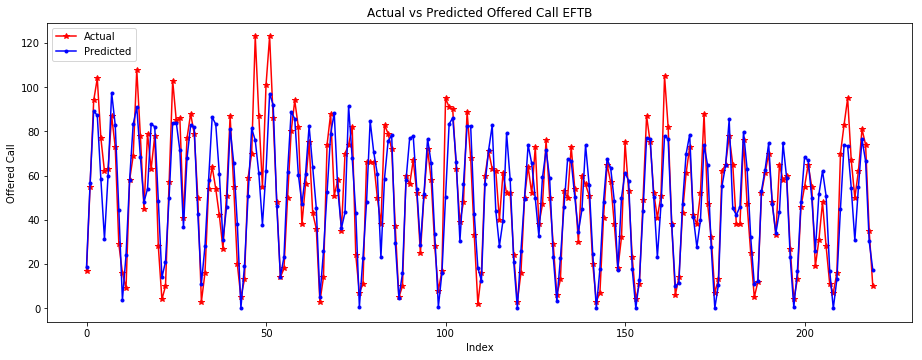

In [85]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_EFTBW[:])), CallDetailWeekday_val['OC_EFTB'].loc[11:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_EFTBW[:])), pred_EFTBW[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EFTB')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

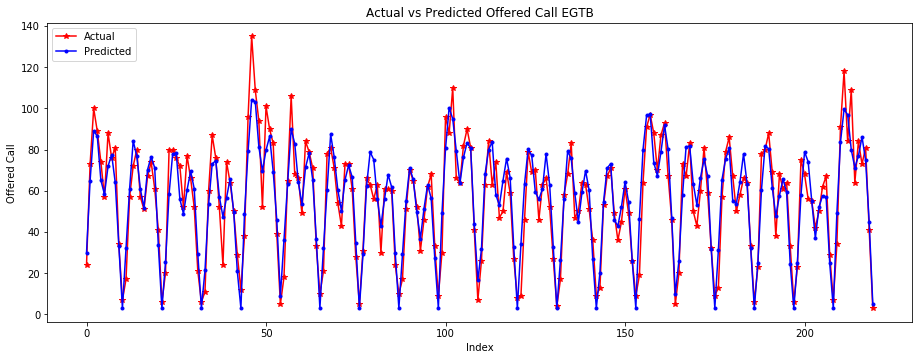

In [83]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_EGTBW[:])), CallDetailWeekday_val['OC_EGTB'].loc[11:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_EGTBW[:])), pred_EGTBW[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EGTB')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

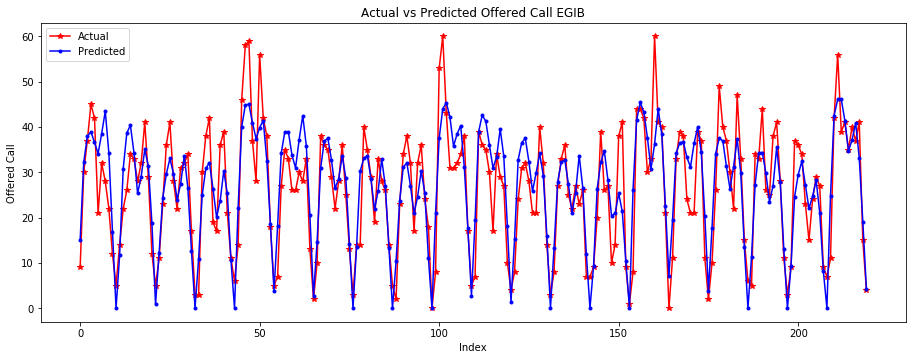

In [82]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_EGIBW[:])), CallDetailWeekday_val['OC_EGIB'].loc[11:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_EGIBW[:])), pred_EGIBW[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EGIB')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

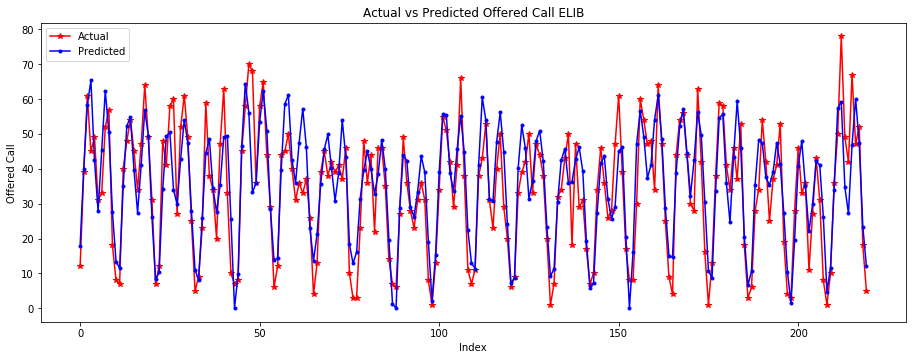

In [81]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_ELIBW[:])), CallDetailWeekday_val['OC_ELIB'].loc[11:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_ELIBW[:])), pred_ELIBW[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call ELIB')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

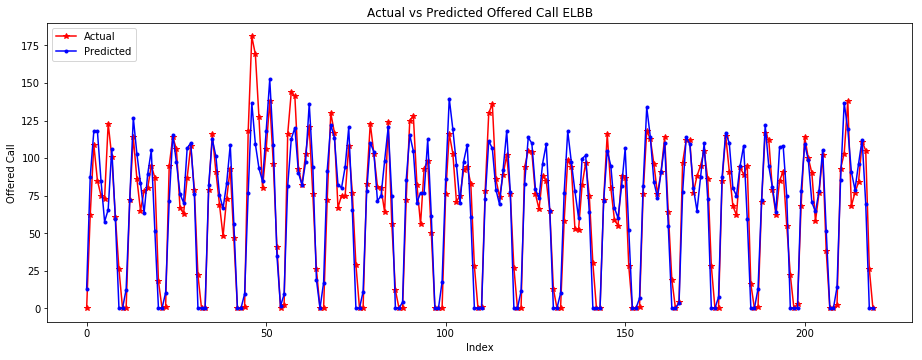

In [79]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_ELBBW[:])), CallDetailWeekday_val['OC_ELBB'].loc[11:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_ELBBW[:])), pred_ELBBW[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call ELBB')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

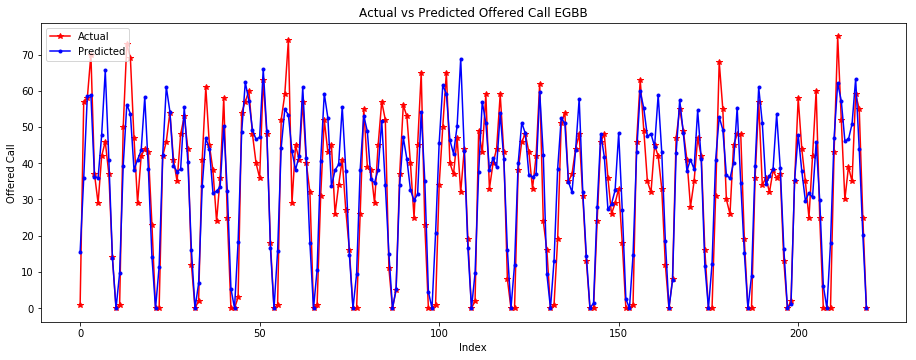

In [78]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_EGBBW[:])), CallDetailWeekday_val['OC_EGBB'].loc[11:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_EGBBW[:])), pred_EGBBW[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EGBB')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

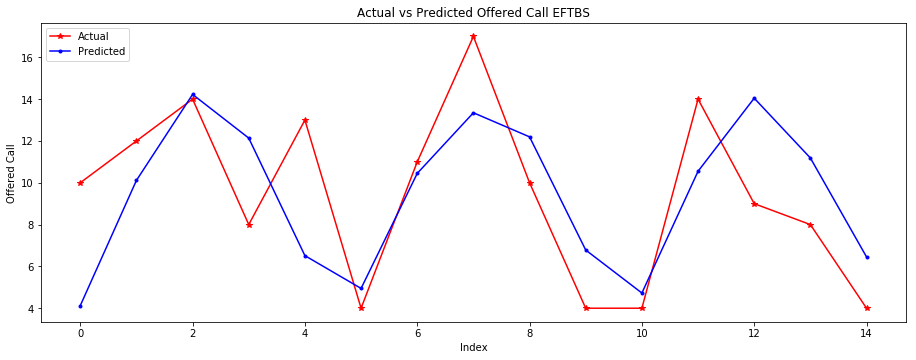

In [90]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_EFTBS[:])), CallDetailWeekend_val['OC_EFTB'].loc[5:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_EFTBS[:])), pred_EFTBS[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EFTBS')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

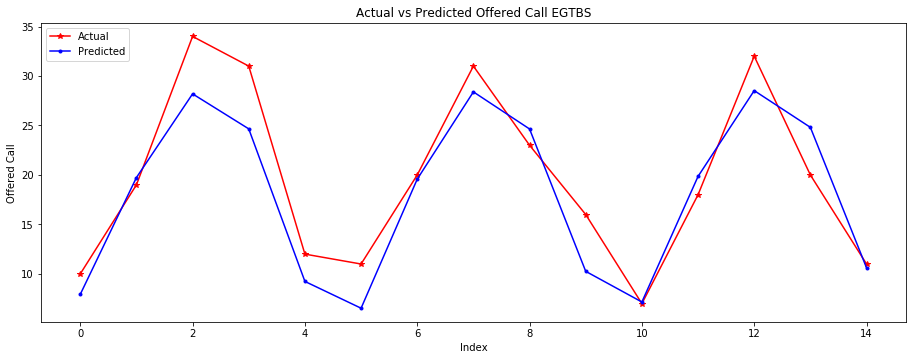

In [91]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_EGTBS[:])), CallDetailWeekend_val['OC_EGTB'].loc[5:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_EGTBS[:])), pred_EGTBS[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EGTBS')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

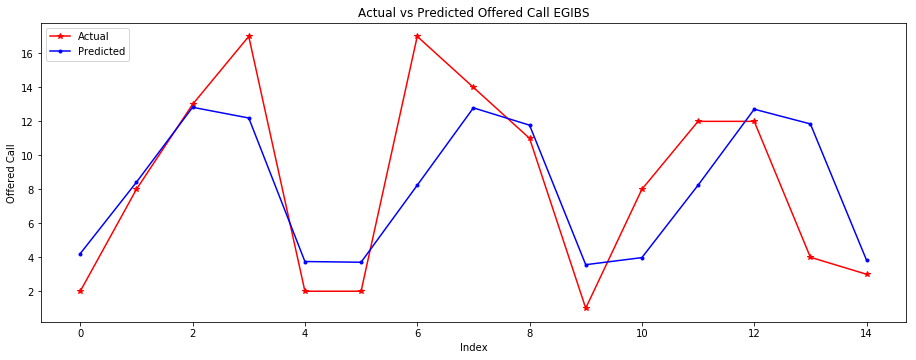

In [92]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_EGIBS[:])), CallDetailWeekend_val['OC_EGIB'].loc[5:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_EGIBS[:])), pred_EGIBS[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EGIBS')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

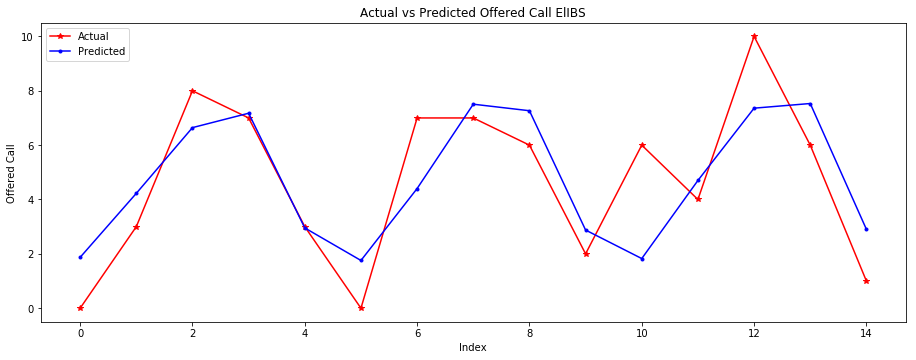

In [107]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_ELIBS[:])), CallDetailWeekend_val['OC_ELIB'].loc[5:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_ELIBS[:])), pred_ELIBS[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call ElIBS')
plt.ylabel('Offered Call')
plt.xlabel('Index')

# Building a separate model for weekday and weekend

In [88]:
from statsmodels.tsa.seasonal import seasonal_decompose

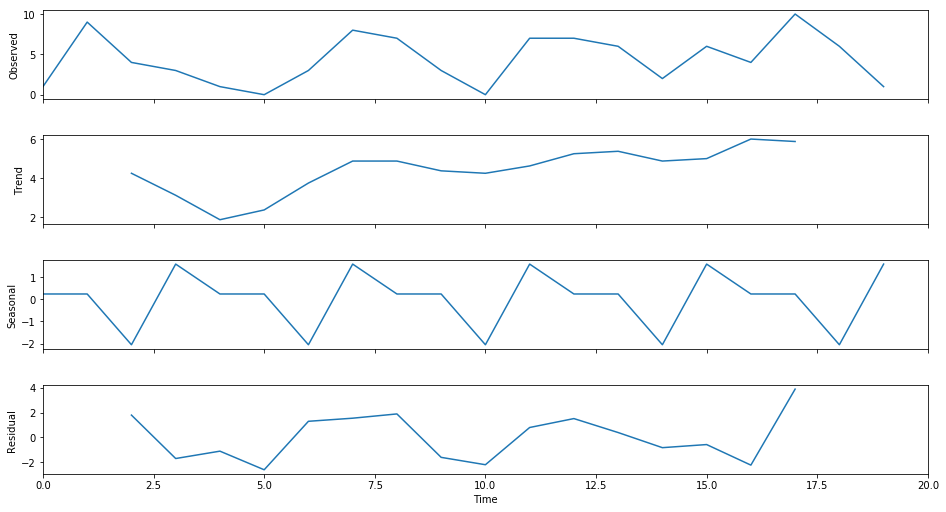

In [98]:
decomposition = seasonal_decompose(CallDetailWeekend_val['OC_ELIB'].loc[:].tolist(), freq=5)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
plt.show()

In [111]:
pd.DataFrame({'':'',:}).to_excel('test4.xlsx')

In [70]:
EFTBS_best_model = load_model(os.path.join('keras_models\\Best model so far','EFTBOffered_Call_saturdaymodel_RNN_weights.425-0.0243.hdf5'))
Scalar_EFTBS = EFTBS_best_model.predict(EFTBWeekendX_train)
pred_EFTBS = scaler1s.inverse_transform(Scalar_EFTBS)
pred_EFTBS = np.squeeze(pred_EFTBS)

Text(0.5,0,'Index')

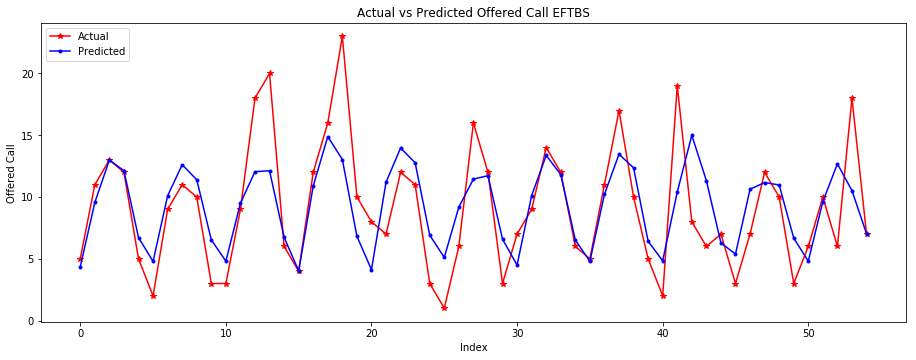

In [71]:
plt.figure(figsize=(15.5, 5.5))
plt.plot(range(len(pred_EFTBS[:])), CallDetailWeekend_train['OC_EFTB'].loc[5:], linestyle='-', marker='*', color='r')
plt.plot(range(len(pred_EFTBS[:])), pred_EFTBS[:], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EFTBS')
plt.ylabel('Offered Call')
plt.xlabel('Index')

In [72]:
print(mean_squared_error(CallDetailWeekend_train['OC_EFTB'].loc[5:], pred_EFTBS))

12.467578424534254


Text(0.5,0,'Index')

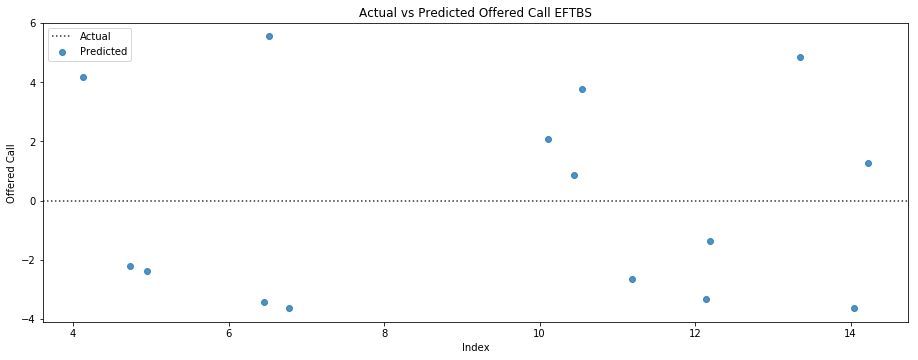

In [108]:
#Let's plot the first 50 actual and predicted values of offered call.
plt.figure(figsize=(15.5, 5.5))
sns.residplot(pred_EFTBS[:], CallDetailWeekend_val['OC_EFTB'].loc[5:])
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EFTBS')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

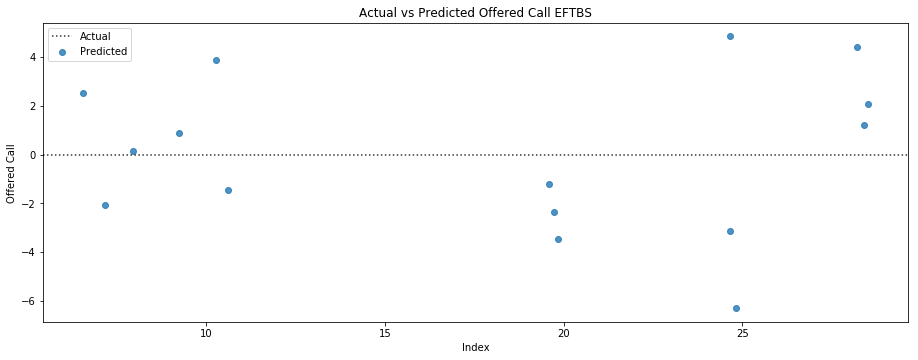

In [109]:
plt.figure(figsize=(15.5, 5.5))
sns.residplot(pred_EGTBS[:], CallDetailWeekend_val['OC_EGTB'].loc[5:])
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EFTBS')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

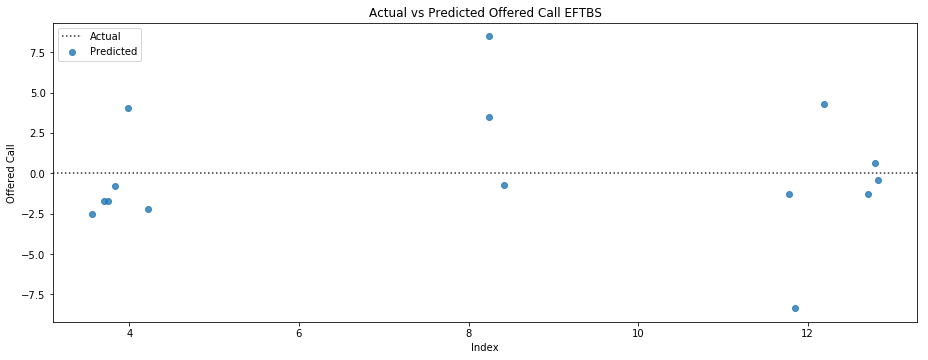

In [110]:
plt.figure(figsize=(15.5, 5.5))
sns.residplot(pred_EGIBS[:], CallDetailWeekend_val['OC_EGIB'].loc[5:])
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call EFTBS')
plt.ylabel('Offered Call')
plt.xlabel('Index')

Text(0.5,0,'Index')

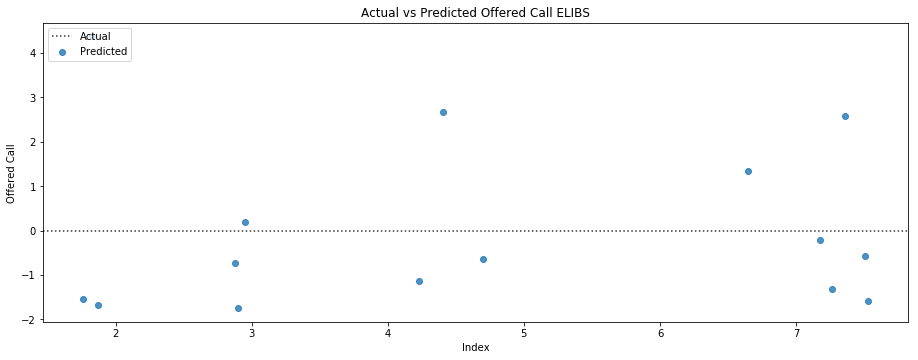

In [111]:
plt.figure(figsize=(15.5, 5.5))
sns.residplot(pred_ELIBS[:], CallDetailWeekend_val['OC_ELIB'].loc[5:])
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted Offered Call ELIBS')
plt.ylabel('Offered Call')
plt.xlabel('Index')

In [105]:
from sklearn.externals import joblib
joblib.dump(scaler1, 'EFTBScalerworkingday.pkl')
joblib.dump(scaler2, 'EGTBScalerworkingday.pkl')
joblib.dump(scaler3, 'EGIBScalerworkingday.pkl')
joblib.dump(scaler4, 'ELIBScalerworkingday.pkl')
joblib.dump(scaler5, 'ELBBScalerworkingday.pkl')
joblib.dump(scaler6, 'EGBBScalerworkingday.pkl')
joblib.dump(scaler1s, 'EFTBScalersaturday.pkl')
joblib.dump(scaler2s, 'EGTBScalersaturday.pkl')
joblib.dump(scaler3s, 'EGIBScalersaturday.pkl')
joblib.dump(scaler4s, 'ELIBScalersaturday.pkl')


['ELIBScalersaturday.pkl']

In [106]:
ELIBWeekendX_val.shape

(15, 10, 1)

In [115]:
pd.DataFrame({'Predicted':pred_EFTBW[:],'True Value':CallDetailWeekday_val['OC_EFTB'].loc[11:]}).to_excel('test5.xlsx')